In [343]:
import pandas as pd
#from odps.inter import enter, setup, teardown
#from odps.df import DataFrame
import copy
import pandas as pd
import numpy as np
#from odps import ODPS
from datetime import datetime
#import pyarrow as pa
import pandas as pd
import numpy as np
from pylab import figure, show, legend, ylabel
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
#import fbprophet
#import Fbprophet

## Data Import

In [2]:
#import orders
o13 = pd.read_csv("orders_2013.csv", names=['shop_id','tid','buyer_nick','status','payment_post_fee','post_fee','created','pay_time','receiver_state','receiver_city','receiver_district','receiver_address','receiver_town','seller_nick','end_time','trade_from','type','modified','mobile'])
o14 = pd.read_csv("orders_2014.csv", names=['shop_id','tid','buyer_nick','status','payment_post_fee','post_fee','created','pay_time','receiver_state','receiver_city','receiver_district','receiver_address','receiver_town','seller_nick','end_time','trade_from','type','modified','mobile'])
o15 = pd.read_csv("orders_2015.csv", names=['shop_id','tid','buyer_nick','status','payment_post_fee','post_fee','created','pay_time','receiver_state','receiver_city','receiver_district','receiver_address','receiver_town','seller_nick','end_time','trade_from','type','modified','mobile'])
o16 = pd.read_csv("orders_2016.csv", names=['shop_id','tid','buyer_nick','status','payment_post_fee','post_fee','created','pay_time','receiver_state','receiver_city','receiver_district','receiver_address','receiver_town','seller_nick','end_time','trade_from','type','modified','mobile'])
o17 = pd.read_csv("orders_2017.csv", names=['shop_id','tid','buyer_nick','status','payment_post_fee','post_fee','created','pay_time','receiver_state','receiver_city','receiver_district','receiver_address','receiver_town','seller_nick','end_time','trade_from','type','modified','mobile'])
o18 = pd.read_csv("orders_2018.csv", names=['shop_id','tid','buyer_nick','status','payment_post_fee','post_fee','created','pay_time','receiver_state','receiver_city','receiver_district','receiver_address','receiver_town','seller_nick','end_time','trade_from','type','modified','mobile'])
o19 = pd.read_csv("orders_2019.csv", names=['shop_id','tid','buyer_nick','status','payment_post_fee','post_fee','created','pay_time','receiver_state','receiver_city','receiver_district','receiver_address','receiver_town','seller_nick','end_time','trade_from','type','modified','mobile'])

In [3]:
#import order detail
d13 = pd.read_csv("orderdetail_2013.csv", index_col=False, names=['tid','oid','outer_sku_id','title','num','price','logistics_company','status','outer_iid','num_iid','sku_id','sku_properties_name','created','order_from','type']) 
d14 = pd.read_csv("orderdetail_2014.csv", index_col=False, names=['tid','oid','outer_sku_id','title','num','price','logistics_company','status','outer_iid','num_iid','sku_id','sku_properties_name','created','order_from','type'])
d15 = pd.read_csv("orderdetail_2015.csv", index_col=False, names=['tid','oid','outer_sku_id','title','num','price','logistics_company','status','outer_iid','num_iid','sku_id','sku_properties_name','created','order_from','type'])
d16 = pd.read_csv("orderdetail_2016.csv", index_col=False, names=['tid','oid','outer_sku_id','title','num','price','logistics_company','status','outer_iid','num_iid','sku_id','sku_properties_name','created','order_from','type'])
d17 = pd.read_csv("orderdetail_2017.csv", index_col=False, names=['tid','oid','outer_sku_id','title','num','price','logistics_company','status','outer_iid','num_iid','sku_id','sku_properties_name','created','order_from','type'])
d18 = pd.read_csv("orderdetail_2018.csv", index_col=False, names=['tid','oid','outer_sku_id','title','num','price','logistics_company','status','outer_iid','num_iid','sku_id','sku_properties_name','created','order_from','type'])
d19 = pd.read_csv("orderdetail_2019.csv", index_col=False, names=['tid','oid','outer_sku_id','title','num','price','logistics_company','status','outer_iid','num_iid','sku_id','sku_properties_name','created','order_from','type'])

In [4]:
#o15

In [5]:
#d18 

## Data preprocessing

Remove Blank Columns

In [6]:
#Remove blank columns
d13 = d13.drop(['outer_iid','num_iid','sku_id','sku_properties_name','created','order_from','type'], axis = 1)
d14 = d14.drop(['outer_iid','num_iid','sku_id','sku_properties_name','created','order_from','type'], axis = 1)
d15 = d15.drop(['outer_iid','num_iid','sku_id','sku_properties_name','created','order_from','type'], axis = 1)
d16 = d16.drop(['outer_iid','num_iid','sku_id','sku_properties_name','created','order_from','type'], axis = 1)
d17 = d17.drop(['outer_iid','num_iid','sku_id','sku_properties_name','created','order_from','type'], axis = 1)
d18 = d18.drop(['outer_iid','num_iid','sku_id','sku_properties_name','created','order_from','type'], axis = 1)
d19 = d19.drop(['outer_iid','num_iid','sku_id','sku_properties_name','created','order_from','type'], axis = 1)

Transfer to Datetime for Orders

In [7]:
#2013 Orders
o13['created']=pd.to_datetime(o13['created'])
o13['pay_time']=pd.to_datetime(o13['pay_time'])
o13['end_time']=pd.to_datetime(o13['end_time'])
o13['modified']=pd.to_datetime(o13['modified'])

In [8]:
#2014 Orders
o14['created']=pd.to_datetime(o14['created'])
o14['pay_time']=pd.to_datetime(o14['pay_time'])
o14['end_time']=pd.to_datetime(o14['end_time'])
o14['modified']=pd.to_datetime(o14['modified'])

In [9]:
#2015 Orders
o15['created']=pd.to_datetime(o15['created'])
o15['pay_time']=pd.to_datetime(o15['pay_time'])
o15['end_time']=pd.to_datetime(o15['end_time'])
o15['modified']=pd.to_datetime(o15['modified'])

In [10]:
#2016 Orders
o16['created']=pd.to_datetime(o16['created'])
o16['pay_time']=pd.to_datetime(o16['pay_time'])
o16['end_time']=pd.to_datetime(o16['end_time'])
o16['modified']=pd.to_datetime(o16['modified'])

In [11]:
#2017 Orders
o17['created']=pd.to_datetime(o17['created'])
o17['pay_time']=pd.to_datetime(o17['pay_time'])
o17['end_time']=pd.to_datetime(o17['end_time'])
o17['modified']=pd.to_datetime(o17['modified'])

In [12]:
#2018 Orders
o18['created']=pd.to_datetime(o18['created'])
o18['pay_time']=pd.to_datetime(o18['pay_time'])
o18['end_time']=pd.to_datetime(o18['end_time'])
o18['modified']=pd.to_datetime(o18['modified'])

In [13]:
#2019 Orders
o19['created']=pd.to_datetime(o19['created'])
o19['pay_time']=pd.to_datetime(o19['pay_time'])
o19['end_time']=pd.to_datetime(o19['end_time'])
o19['modified']=pd.to_datetime(o19['modified'])

In [14]:
#o15.info()

In [15]:
#d15.info()

Extract Year, Month and Date for aggregation

In [16]:
# Get date format for orders based on transaction end time
o13['date']=o13['end_time'].dt.date
o13['year']=o13['end_time'].dt.year
o13['quarter']=o13['end_time'].dt.quarter
o13['month']=o13['end_time'].dt.month
o13['day']=o13['end_time'].dt.day
o13['season']=o13['month'].map({1:'Winter',2:'Winter',3:'Spring',4:'Spring',5:'Spring',6:'Summer',7:'Summer',8:'Summer',9:'Autumn',10:'Autumn',11:'Autumn',12:'Winter'})
#o13['d'] = o13[['created']].timetuple().tm_yday
#o13['d']= datetime.datetime(o13['created']).timetuple()
#o13['d']
#type(o13['created'].dt.timetuple().tm_yday)


In [17]:
#2014
o14['date']=o14['end_time'].dt.date
o14['year']=o14['end_time'].dt.year
o14['quarter']=o14['end_time'].dt.quarter
o14['month']=o14['end_time'].dt.month
o14['day']=o14['end_time'].dt.day
o14['season']=o14['month'].map({1:'Winter',2:'Winter',3:'Spring',4:'Spring',5:'Spring',6:'Summer',7:'Summer',8:'Summer',9:'Autumn',10:'Autumn',11:'Autumn',12:'Winter'})

In [18]:
#2015
o15['date']=o15['end_time'].dt.date
o15['year']=o15['end_time'].dt.year
o15['quarter']=o15['end_time'].dt.quarter
o15['month']=o15['end_time'].dt.month
o15['day']=o15['end_time'].dt.day
o15['season']=o15['month'].map({1:'Winter',2:'Winter',3:'Spring',4:'Spring',5:'Spring',6:'Summer',7:'Summer',8:'Summer',9:'Autumn',10:'Autumn',11:'Autumn',12:'Winter'})

In [19]:
#2016
o16['date']=o16['end_time'].dt.date
o16['year']=o16['end_time'].dt.year
o16['quarter']=o16['end_time'].dt.quarter
o16['month']=o16['end_time'].dt.month
o16['day']=o16['end_time'].dt.day
o16['season']=o16['month'].map({1:'Winter',2:'Winter',3:'Spring',4:'Spring',5:'Spring',6:'Summer',7:'Summer',8:'Summer',9:'Autumn',10:'Autumn',11:'Autumn',12:'Winter'})

In [20]:
#2017
o17['date']=o17['end_time'].dt.date
o17['year']=o17['end_time'].dt.year
o17['quarter']=o17['end_time'].dt.quarter
o17['month']=o17['end_time'].dt.month
o17['day']=o17['end_time'].dt.day
o17['season']=o17['month'].map({1:'Winter',2:'Winter',3:'Spring',4:'Spring',5:'Spring',6:'Summer',7:'Summer',8:'Summer',9:'Autumn',10:'Autumn',11:'Autumn',12:'Winter'})

In [21]:
#2018
o18['date']=o18['end_time'].dt.date
o18['year']=o18['end_time'].dt.year
o18['quarter']=o18['end_time'].dt.quarter
o18['month']=o18['end_time'].dt.month
o18['day']=o18['end_time'].dt.day
o18['season']=o18['month'].map({1:'Winter',2:'Winter',3:'Spring',4:'Spring',5:'Spring',6:'Summer',7:'Summer',8:'Summer',9:'Autumn',10:'Autumn',11:'Autumn',12:'Winter'})

In [22]:
#2019
o19['date']=o19['end_time'].dt.date
o19['year']=o19['end_time'].dt.year
o19['quarter']=o19['end_time'].dt.quarter
o19['month']=o19['end_time'].dt.month
o19['day']=o19['end_time'].dt.day
o19['season']=o19['month'].map({1:'Winter',2:'Winter',3:'Spring',4:'Spring',5:'Spring',6:'Summer',7:'Summer',8:'Summer',9:'Autumn',10:'Autumn',11:'Autumn',12:'Winter'})

Cities-tier Labeling

In [23]:
target_values = {'first_tier':['北京市','上海市','广州市','深圳市'],
                 'new_first_tier':['成都市','杭州市','重庆市','武汉市','西安市','苏州市','天津市',
                                   '南京市','长沙市','郑州市','东莞市','青岛市','沈阳市','宁波市','昆明市'],
                 'second_tier':['大连市', '厦门市','合肥市','佛山市','福州市','哈尔滨市','济南市',
                                '温州市','长春市','石家庄市','常州市','泉州市','南宁市','贵阳市','南昌市',
                                '南通市','金华市','徐州市','太原市','嘉兴市','烟台市','惠州市','保定市',
                                '台州市','中山市','绍兴市','乌鲁木齐市','无锡市','兰州市','海口市','珠海市'],
                 'third_tier':['唐山市','三亚市','潍坊市','保定市','镇江市','扬州市','桂林市','湖州市','呼和浩特市',
                               '廊坊市','洛阳市','威海市','盐城市','临沂市','江门市','汕头市','泰州市','漳州市',
                               '邯郸市','济宁市','芜湖市','淄博市','银川市','柳州市','绵阳市','湛江市',
                               '鞍山市','赣州市','大庆市','宜昌市','包头市','咸阳市','秦皇岛市','株洲市',
                               '莆田市','吉林市','淮安市','肇庆市','宁德市','衡阳市','南平市','连云港市','丹东市',
                               '丽江市','揭阳市','延边朝鲜族自治州','舟山市','九江市','龙岩市','沧州市','抚顺市',
                               '襄阳市','上饶市','营口市','三明市','蚌埠市','丽水市','岳阳市','清远市','荆州市','襄樊市',
                               '泰安市','衢州市','盘锦市','东营市','南阳市','马鞍山市','南充市','西宁市','孝感市','齐齐哈尔市',
                              '巢湖市'],
                 'fourth_tier':['鄂尔多斯市','乐山市','湘潭市','遵义市','宿迁市','新乡市','信阳市','滁州市','锦州市',
                                '潮州市','黄冈市','开封市','德阳市','德州市','梅州市','邢台市','茂名市','大理白族自治州',
                                '韶关市','商丘市','安庆市','黄石市','六安市','玉林市','宜春市','北海市','牡丹江市',
                                '张家口市','梧州市','日照市','咸宁市','常德市','佳木斯市','红河哈尼族彝族自治州','黔东南苗族侗族自治州',
                                '阳江市','晋中市','渭南市','呼伦贝尔市','恩施土家族苗族自治州','河源市','郴州市','阜阳市','聊城市',
                                '大同市','宝鸡市','许昌市','赤峰市','运城市','安阳市','临汾市','宣城市','曲靖市','西双版纳傣族自治州',
                                '邵阳市','葫芦岛市','平顶山市','辽阳市','菏泽市','本溪市','驻马店市','汕尾市','焦作市','黄山市',
                                '怀化市','四平市','榆林市','十堰市','宜宾市','滨州市','抚州市','淮南市','周口市','黔南布依族苗族自治州',
                                '泸州市','玉溪市','眉山市','通化市','宿州市','枣庄市','内江市','遂宁市','吉安市','通辽市','景德镇市',
                                '阜新市','雅安市','铁岭市','承德市','娄底市','潜江市','仙桃市','天门市'],
                 'fifth_tier':['永州市','绥化市','克拉玛依市','长治市','巴音郭楞蒙古自治州','拉萨市','云浮市','益阳市','百色市','资阳市',
                               '荆门市','松原市','凉山彝族自治州','达州市','伊犁哈萨克自治州','广安市','自贡市','汉中市','朝阳市','漯河市',
                               '钦州市','贵港市','安顺市','鄂州市','广元市','河池市','鹰潭市','乌兰察布市','铜陵市','昌吉回族自治州',
                               '衡水市','黔西南布依族苗族自治州','濮阳市','锡林郭勒盟','巴彦淖尔市','鸡西市','贺州市','防城港市',
                               '兴安盟','白山市','三门峡市','忻州市','双鸭山市','楚雄彝族自治州','新余市','来宾市','淮北市','亳州市',
                               '湘西土家族苗族自治州','吕梁市','攀枝花市','晋城市','延安市','毕节市','张家界市','酒泉市','崇左市','萍乡市',
                               '乌海市','伊春市','六盘水市','随州市','德宏傣族景颇族自治州','池州市','黑河市','哈密市','文山壮族苗族自治州',
                               '阿坝藏族羌族自治州','天水市','辽源市','张掖市','铜仁市','鹤壁市','儋州市','保山市','安康市','白城市',
                               '巴中市','普洱市','鹤岗市','莱芜市','阳泉市','甘孜藏族自治州','嘉峪关市','白银市','临沧市','商洛市',
                               '阿克苏地区','海西蒙古族藏族自治州','大兴安岭地区','七台河市','朔州市','铜川市','定西市','迪庆藏族自治州',
                               '日喀则市','庆阳市','昭通市','喀什地区','怒江傈僳族自治州','海东市','阿勒泰地区','平凉市','石嘴山市','武威市',
                               '阿拉善盟','塔城地区','林芝市','金昌市','三沙市','吴忠市','中卫市','陇南市','山南市','吐鲁番市','博尔塔拉蒙古自治州',
                               '临夏回族自治州','固原市','甘南藏族自治州','昌都市','阿里地区','海南藏族自治州','和田地区','克孜勒苏柯尔克孜自治州',
                               '海北藏族自治州','那曲地区','玉树藏族自治州','黄南藏族自治州','果洛藏族自治州','毕节地区','铜仁地区',
                               '石河子市','哈密地区','济源市','吐鲁番地区','海东地区','林芝地区','五家渠市','昌都地区','琼海市','山南地区',
                               '陵水黎族自治县','日喀则地区','文昌市','阿拉尔市','万宁市','昌江黎族自治县','东方市','乐东黎族自治县',
                               '五指山市','神农架林区','澄迈县','屯昌县','保亭黎族苗族自治县','定安县','白沙黎族自治县','琼中黎族苗族自治县',
                               '临高县','图木舒克市','河南省','湖北省','海南省','西沙群岛','广东省','北屯市','昆玉市',
                               '铁门关市','可克达拉市','那曲市','北海'],
                 'hongkong_macau_taiwan':['台北市','台南市','嘉义市','新北市','桃园县','九龙','香港岛','新界',
                                          '离岛','澳门半岛','台中市','宜兰县','高雄市','嘉义县','新竹市','彰化县',
                                         '新竹县','桃园市'],
                 'overseas':['海外','吉隆坡','马六甲市','山打根','Sydney','Melbourne','2 rock ranch station','3 notch','Kulai',
                             'Kuala Lumpur','Abbeville','Amer assc retired persons','Greater Vancouver',
                             'Yong Peng','Bkt. Mertajam','Adams state college','Brisbane','Penang','Saskatoon',
                             'Johor Baharu','Kota Kinabalu','Burwood','5 points','Wood Buffalo','Abel','Perth',
                             'Levis','Greater Vancouver','Botany Bay','Miami','Norfolk','Hurstville','Launceston',
                             'Hobart','Andover','Taiping','Irvine']
                 
    
}

In [24]:
for k,v in target_values.items():
    o13.loc[o13.receiver_city.isin(v),"cities_tier"] = k,
    o14.loc[o14.receiver_city.isin(v),"cities_tier"] = k,
    o15.loc[o15.receiver_city.isin(v),"cities_tier"] = k,
    o16.loc[o16.receiver_city.isin(v),"cities_tier"] = k,
    o17.loc[o17.receiver_city.isin(v),"cities_tier"] = k,
    o18.loc[o18.receiver_city.isin(v),"cities_tier"] = k,
    o19.loc[o19.receiver_city.isin(v),"cities_tier"] = k

In [25]:
# Remove abnormal order detail in order detail table for 2013-2018 data
d13 = d13[(d13['status']!='WAIT_BUYER_PAY')|(d13['status']!='WAIT_SELLER_SEND_GOODS')|(d13['status']!='WAIT_BUYER_CONFIRM_GOODS')]
d14 = d14[(d14['status']!='WAIT_BUYER_PAY')|(d14['status']!='WAIT_SELLER_SEND_GOODS')|(d14['status']!='WAIT_BUYER_CONFIRM_GOODS')]
d15 = d15[(d15['status']!='WAIT_BUYER_PAY')|(d15['status']!='WAIT_SELLER_SEND_GOODS')|(d15['status']!='WAIT_BUYER_CONFIRM_GOODS')]
d16 = d16[(d16['status']!='WAIT_BUYER_PAY')|(d16['status']!='WAIT_SELLER_SEND_GOODS')|(d16['status']!='WAIT_BUYER_CONFIRM_GOODS')]
d17 = d17[(d17['status']!='WAIT_BUYER_PAY')|(d17['status']!='WAIT_SELLER_SEND_GOODS')|(d17['status']!='WAIT_BUYER_CONFIRM_GOODS')]
d18 = d18[(d18['status']!='WAIT_BUYER_PAY')|(d18['status']!='WAIT_SELLER_SEND_GOODS')|(d18['status']!='WAIT_BUYER_CONFIRM_GOODS')]
d19 = d19[(d19['status']!='WAIT_BUYER_PAY')|(d19['status']!='WAIT_SELLER_SEND_GOODS')|(d19['status']!='WAIT_BUYER_CONFIRM_GOODS')]


Merge orders and order detail table

In [26]:
#Merge orders and order detail table
od13 = pd.merge(o13,d13,left_on='tid',right_on='tid',how='inner')
od14 = pd.merge(o14,d14,left_on='tid',right_on='tid',how='inner')
od15 = pd.merge(o15,d15,left_on='tid',right_on='tid',how='inner')
od16 = pd.merge(o16,d16,left_on='tid',right_on='tid',how='inner')
od17 = pd.merge(o17,d17,left_on='tid',right_on='tid',how='inner')
od18 = pd.merge(o18,d18,left_on='tid',right_on='tid',how='inner')
od19 = pd.merge(o19,d19,left_on='tid',right_on='tid',how='inner')

In [27]:
#columns rename
od13 = od13.rename(columns={'status_x':'order_status','status_y':'detail_status'})
od14 = od14.rename(columns={'status_x':'order_status','status_y':'detail_status'})
od15 = od15.rename(columns={'status_x':'order_status','status_y':'detail_status'})
od16 = od16.rename(columns={'status_x':'order_status','status_y':'detail_status'})
od17 = od17.rename(columns={'status_x':'order_status','status_y':'detail_status'})
od18 = od18.rename(columns={'status_x':'order_status','status_y':'detail_status'})
od19 = od19.rename(columns={'status_x':'order_status','status_y':'detail_status'})

In [28]:
#assign order count as 1
od13['count']=1
od14['count']=1
od15['count']=1
od16['count']=1
od17['count']=1
od18['count']=1
od19['count']=1

In [29]:
#Assign ID for each customer
df13 = od13['buyer_nick'].value_counts()
df13 = df13.reset_index()
df13 = df13.reset_index()
df13.columns = ['buyer_id','buyer_nick','count']
m13 = df13.drop(['count'],axis=1)
od13 = od13.merge(m13, on='buyer_nick')

df14 = od14['buyer_nick'].value_counts()
df14 = df14.reset_index()
df14 = df14.reset_index()
df14.columns = ['buyer_id','buyer_nick','count']
m14 = df14.drop(['count'],axis=1)
od14 = od14.merge(m14, on='buyer_nick')

df15 = od15['buyer_nick'].value_counts()
df15 = df15.reset_index()
df15 = df15.reset_index()
df15.columns = ['buyer_id','buyer_nick','count']
m15 = df15.drop(['count'],axis=1)
od15 = od15.merge(m15, on='buyer_nick')

df16 = od16['buyer_nick'].value_counts()
df16 = df16.reset_index()
df16 = df16.reset_index()
df16.columns = ['buyer_id','buyer_nick','count']
m16 = df16.drop(['count'],axis=1)
od16 = od16.merge(m16, on='buyer_nick')

df17 = od17['buyer_nick'].value_counts()
df17 = df17.reset_index()
df17 = df17.reset_index()
df17.columns = ['buyer_id','buyer_nick','count']
m17 = df17.drop(['count'],axis=1)
od17 = od17.merge(m17, on='buyer_nick')

df18 = od18['buyer_nick'].value_counts()
df18 = df18.reset_index()
df18 = df18.reset_index()
df18.columns = ['buyer_id','buyer_nick','count']
m18 = df18.drop(['count'],axis=1)
od18 = od18.merge(m18, on='buyer_nick')

df19 = od19['buyer_nick'].value_counts()
df19 = df19.reset_index()
df19 = df19.reset_index()
df19.columns = ['buyer_id','buyer_nick','count']
m19 = df19.drop(['count'],axis=1)
od19 = od19.merge(m19, on='buyer_nick')

In [30]:
# Order status: 
# Trade Finished, customer finished the purchase
# Trade Closed, customer purchased and cancelled later
# Trade Closed by Taobao, customer didn't pay and the order was closed by taobao.

In [31]:
#Get the trade finished table
tf13 = od13[od13['order_status']=='TRADE_FINISHED']
tf14 = od14[od14['order_status']=='TRADE_FINISHED']
tf15 = od15[od15['order_status']=='TRADE_FINISHED']
tf16 = od16[od16['order_status']=='TRADE_FINISHED']
tf17 = od17[od17['order_status']=='TRADE_FINISHED']
tf18 = od18[od18['order_status']=='TRADE_FINISHED']
tf19 = od19[od19['order_status']=='TRADE_FINISHED']

In [32]:
#tf194 = od19[od19['order_status']=='TRADE_FINISHED']
#tf194 = tf194[tf194['shop_id']==14]
#tf194 = tf194[tf194['month']==4]

In [33]:
#tf194.to_excel('201904_record.xlsx')

In [34]:
# Possible Approach
# 1 Status distribution every year
# 2.1 Seasonality trend every year(trade finished)
# 2.2 Quarterly trend every year(trade finished)
# 2.3 Monthly trend every year(trade finished)
# 4 cities_tier trend every year(trade finished)
# 5.1 Time series sales volume for 3 shops(trade finished)
# 5.2 Sales volume increment rate per year


## Shop EDA

Overall yearly understanding

In [35]:
# Get yearly shop contribution
#2013
t13 = pd.pivot_table(od13, index=['order_status'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
t13 = t13.reset_index()
t13 = t13.fillna(0)

#2014
t14 = pd.pivot_table(od14, index=['order_status'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
t14 = t14.reset_index()
t14 = t14.fillna(0)

#2015
t15 = pd.pivot_table(od15, index=['order_status'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
t15 = t15.reset_index()
t15 = t15.fillna(0)

#2016
t16 = pd.pivot_table(od16, index=['order_status'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
t16 = t16.reset_index()
t16 = t16.fillna(0)

#2017
t17 = pd.pivot_table(od17, index=['order_status'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
t17 = t17.reset_index()
t17 = t17.fillna(0)

#2018
t18 = pd.pivot_table(od18, index=['order_status'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
t18 = t18.reset_index()
t18 = t18.fillna(0)

#2019
t19 = pd.pivot_table(od19, index=['order_status'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
t19 = t19.reset_index()
t19 = t19.fillna(0)


In [36]:
# Get velue in Million
#2013
t13['2013'] = t13[2013].div(1000000).round(2)
t13['2014'] = t13[2014].div(1000000).round(2)

#2014
t14['2014'] = t14[2014].div(1000000).round(2)
t14['2015'] = t14[2015].div(1000000).round(2)

#2015
t15['2015'] = t15[2015].div(1000000).round(2)
t15['2016'] = t15[2016].div(1000000).round(2)

#2016
t16['2016'] = t16[2016].div(1000000).round(2)
t16['2017'] = t16[2017].div(1000000).round(2)

#2017
t17['2017'] = t17[2017].div(1000000).round(2)
t17['2018'] = t17[2018].div(1000000).round(2)

#2018
t18['2018'] = t18[2018].div(1000000).round(2)
t18['2019'] = t18[2019].div(1000000).round(2)

#2019
t19['2019'] = t19[2019].div(1000000).round(2)


In [37]:
# Get the yearly sales sum
t4 = t13.add(t14,fill_value=0)
t4['order_status'] = t4['order_status'].replace({'TRADE_CLOSEDTRADE_CLOSED':'TRADE_CLOSED',
                                                 'TRADE_CLOSED_BY_TAOBAOTRADE_CLOSED_BY_TAOBAO':'TRADE_CLOSED_BY_TAOBAO',
                                                'TRADE_FINISHEDTRADE_FINISHED':'TRADE_FINISHED'})

t5 = t4.add(t15,fill_value=0)
t5['order_status'] = t5['order_status'].replace({'TRADE_CLOSEDTRADE_CLOSED':'TRADE_CLOSED',
                                                 'TRADE_CLOSED_BY_TAOBAOTRADE_CLOSED_BY_TAOBAO':'TRADE_CLOSED_BY_TAOBAO',
                                                'TRADE_FINISHEDTRADE_FINISHED':'TRADE_FINISHED'})

t6 = t5.add(t16,fill_value=0)
t6['order_status'] = t6['order_status'].replace({'TRADE_CLOSEDTRADE_CLOSED':'TRADE_CLOSED',
                                                 'TRADE_CLOSED_BY_TAOBAOTRADE_CLOSED_BY_TAOBAO':'TRADE_CLOSED_BY_TAOBAO',
                                                'TRADE_FINISHEDTRADE_FINISHED':'TRADE_FINISHED'})

t7 = t6.add(t17,fill_value=0)
t7['order_status'] = t7['order_status'].replace({'TRADE_CLOSEDTRADE_CLOSED':'TRADE_CLOSED',
                                                 'TRADE_CLOSED_BY_TAOBAOTRADE_CLOSED_BY_TAOBAO':'TRADE_CLOSED_BY_TAOBAO',
                                                'TRADE_FINISHEDTRADE_FINISHED':'TRADE_FINISHED'})

t8 = t7.add(t18,fill_value=0)
t8['order_status'] = t8['order_status'].replace({'TRADE_CLOSEDTRADE_CLOSED':'TRADE_CLOSED',
                                                 'TRADE_CLOSED_BY_TAOBAOTRADE_CLOSED_BY_TAOBAO':'TRADE_CLOSED_BY_TAOBAO',
                                                'TRADE_FINISHEDTRADE_FINISHED':'TRADE_FINISHED'})
t9 = t8.add(t19,fill_value=0)
t9['order_status'] = t9['order_status'].replace({'TRADE_CLOSEDTRADE_CLOSED':'TRADE_CLOSED',
                                                 'TRADE_CLOSED_BY_TAOBAOTRADE_CLOSED_BY_TAOBAO':'TRADE_CLOSED_BY_TAOBAO',
                                                'TRADE_FINISHEDTRADE_FINISHED':'TRADE_FINISHED'})


In [38]:
t9 = t9.drop([2013,2014,2015,2016,2017,2018,2019],axis=1)

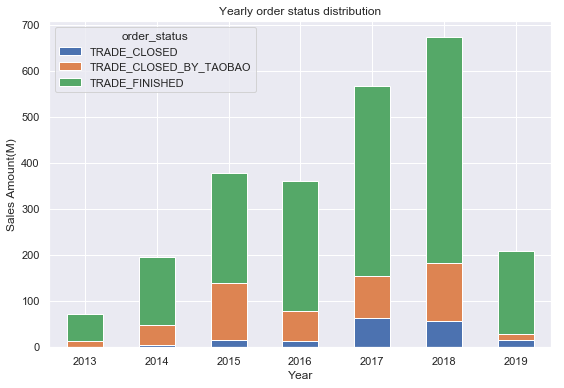

In [39]:


sns.set(rc={'figure.figsize':(9,6)})
ax1 = t9.set_index('order_status').T.plot(kind='bar', stacked=True)

    
plt.xlabel('Year')
plt.ylabel('Sales Amount(M)')
plt.title('Yearly order status distribution')

labels=['2013','2014','2015','2016','2017','2018','2019']
ax1.set_xticklabels(labels, rotation=0)

plt.savefig('Yearly order status distribution.png')


Yearly Seasonality Distribution

In [40]:
# Get yearly season contribution
#2013
se13 = pd.pivot_table(tf13, index=['season'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
se13 = se13.reset_index()
se13 = se13.fillna(0)

#2014
se14 = pd.pivot_table(tf14, index=['season'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
se14 = se14.reset_index()
se14 = se14.fillna(0)

#2015
se15 = pd.pivot_table(tf15, index=['season'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
se15 = se15.reset_index()
se15 = se15.fillna(0)

#2016
se16 = pd.pivot_table(tf16, index=['season'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
se16 = se16.reset_index()
se16 = se16.fillna(0)

#2017
se17 = pd.pivot_table(tf17, index=['season'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
se17 = se17.reset_index()
se17 = se17.fillna(0)

#2018
se18 = pd.pivot_table(tf18, index=['season'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
se18 = se18.reset_index()
se18 = se18.fillna(0)

#2019
se19 = pd.pivot_table(tf19, index=['season'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
se19 = se19.reset_index()
se19 = se19.fillna(0)

In [41]:
# Get velue in Million
#2013
se13['2013'] = se13[2013].div(1000000).round(2)
se13['2014'] = se13[2014].div(1000000).round(2)

#2014
se14['2014'] = se14[2014].div(1000000).round(2)
se14['2015'] = se14[2015].div(1000000).round(2)

#2015
se15['2015'] = se15[2015].div(1000000).round(2)
se15['2016'] = se15[2016].div(1000000).round(2)

#2016
se16['2016'] = se16[2016].div(1000000).round(2)
se16['2017'] = se16[2017].div(1000000).round(2)

#2017
se17['2017'] = se17[2017].div(1000000).round(2)
se17['2018'] = se17[2018].div(1000000).round(2)

#2018
se18['2018'] = se18[2018].div(1000000).round(2)
se18['2019'] = se18[2019].div(1000000).round(2)

#2019
se19['2019'] = se19[2019].div(1000000).round(2)

In [42]:

se4 = se13.add(se14,fill_value=0)
se4['season'] = se4['season'].replace({'SpringSpring':'Spring','SummerSummer':'Summer',
                                      'AutumnAutumn':'Autumn','WinterWinter':'Winter'})
se4 = se4.drop([2013,2014,2015],axis=1)

se15 = se15.drop([2015,2016],axis=1)
se5 = se4.add(se15,fill_value=0)
se5['season'] = se5['season'].replace({'SpringSpring':'Spring','SummerSummer':'Summer',
                                      'AutumnAutumn':'Autumn','WinterWinter':'Winter'})

se16 = se16.drop([2016,2017],axis=1)
se6 = se5.add(se16,fill_value=0)
se6['season'] = se6['season'].replace({'SpringSpring':'Spring','SummerSummer':'Summer',
                                      'AutumnAutumn':'Autumn','WinterWinter':'Winter'})

se17 = se17.drop([2017,2018],axis=1)
se7 = se6.add(se17,fill_value=0)
se7['season'] = se7['season'].replace({'SpringSpring':'Spring','SummerSummer':'Summer',
                                      'AutumnAutumn':'Autumn','WinterWinter':'Winter'})

se18 = se18.drop([2018,2019],axis=1)
se8 = se7.add(se18,fill_value=0)
se8['season'] = se8['season'].replace({'SpringSpring':'Spring','SummerSummer':'Summer',
                                      'AutumnAutumn':'Autumn','WinterWinter':'Winter'})

se19 = se19.drop([2019],axis=1)
se = pd.DataFrame([['Autumn', 0]], columns=['season','2019'])
se19 = se.append(se19, ignore_index=True)

se9 = se8.add(se19,fill_value=0)
se9['season'] = se9['season'].replace({'SpringSpring':'Spring','SummerSummer':'Summer',
                                      'AutumnAutumn':'Autumn','WinterWinter':'Winter'})


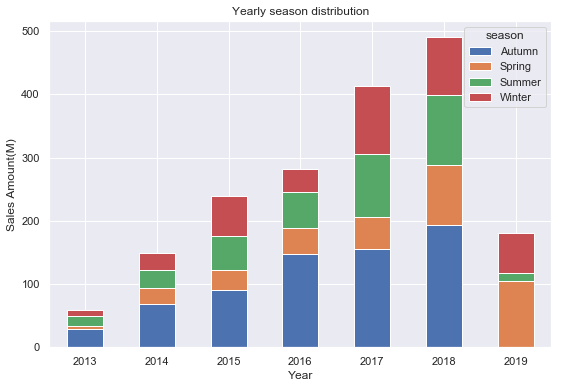

In [43]:
sns.set(rc={'figure.figsize':(9,6)})
ax3 = se9.set_index('season').T.plot(kind='bar', stacked=True)

    
plt.xlabel('Year')
plt.ylabel('Sales Amount(M)')
plt.title('Yearly season distribution')

labels=['2013','2014','2015','2016','2017','2018','2019']
ax3.set_xticklabels(labels, rotation=0)

plt.savefig('Yearly season distribution.png')

In [44]:
#The sales volume in Autumn is obviously higer than others, which may caused by 11.11
# Spring (3-5)
# Summer (6-8)
# Autumn (9-11)
# Winter (12-2)

Quarterly Distribution

In [45]:
# Get quarterly contribution
#2013
q13 = pd.pivot_table(tf13, index=['quarter'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
q13 = q13.reset_index()
q13 = q13.fillna(0)
q13['Qua'] = ['Q1','Q2','Q3','Q4']

#2014
q14 = pd.pivot_table(tf14, index=['quarter'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
q14 = q14.reset_index()
q14 = q14.fillna(0)
q14['Qua'] = ['Q1','Q2','Q3','Q4']

#2015
q15 = pd.pivot_table(tf15, index=['quarter'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
q15 = q15.reset_index()
q15 = q15.fillna(0)
q15['Qua'] = ['Q1','Q2','Q3','Q4']

#2016
q16 = pd.pivot_table(tf16, index=['quarter'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
q16 = q16.reset_index()
q16 = q16.fillna(0)
q16['Qua'] = ['Q1','Q2','Q3','Q4']

#2017
q17 = pd.pivot_table(tf17, index=['quarter'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
q17 = q17.reset_index()
q17 = q17.fillna(0)
q17['Qua'] = ['Q1','Q2','Q3','Q4']

#2018
q18 = pd.pivot_table(tf18, index=['quarter'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
q18 = q18.reset_index()
q18 = q18.fillna(0)
q18['Qua'] = ['Q1','Q2','Q3','Q4']

#2019
q19 = pd.pivot_table(tf19, index=['quarter'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
q19 = q19.reset_index()
q19 = q19.fillna(0)
q19['Qua'] = ['Q1','Q2']


In [46]:
# Get velue in Million
#2013
q13['2013'] = q13[2013].div(1000000).round(2)
q13['2014'] = q13[2014].div(1000000).round(2)
q13 = q13.drop(['quarter'],axis=1)

#2014
q14['2014'] = q14[2014].div(1000000).round(2)
q14['2015'] = q14[2015].div(1000000).round(2)
q14 = q14.drop(['quarter'],axis=1)

#2015
q15['2015'] = q15[2015].div(1000000).round(2)
q15['2016'] = q15[2016].div(1000000).round(2)
q15 = q15.drop(['quarter'],axis=1)

#2016
q16['2016'] = q16[2016].div(1000000).round(2)
q16['2017'] = q16[2017].div(1000000).round(2)
q16 = q16.drop(['quarter'],axis=1)

#2017
q17['2017'] = q17[2017].div(1000000).round(2)
q17['2018'] = q17[2018].div(1000000).round(2)
q17 = q17.drop(['quarter'],axis=1)

#2018
q18['2018'] = q18[2018].div(1000000).round(2)
q18['2019'] = q18[2019].div(1000000).round(2)
q18 = q18.drop(['quarter'],axis=1)

#2019
q19['2019'] = q19[2019].div(1000000).round(2)
q19 = q19.drop(['quarter'],axis=1)

In [47]:
q4 = q13.add(q14,fill_value=0)
q4['Qua'] = q4['Qua'].replace({'Q1Q1':'Q1','Q2Q2':'Q2',
                                      'Q3Q3':'Q3','Q4Q4':'Q4'})

q4 = q4.drop([2013,2014,2015],axis=1)

q15 = q15.drop([2015,2016],axis=1)
q5 = q4.add(q15,fill_value=0)
q5['Qua'] = q5['Qua'].replace({'Q1Q1':'Q1','Q2Q2':'Q2',
                                      'Q3Q3':'Q3','Q4Q4':'Q4'})


q16 = q16.drop([2016,2017],axis=1)
q6 = q5.add(q16,fill_value=0)
q6['Qua'] = q6['Qua'].replace({'Q1Q1':'Q1','Q2Q2':'Q2',
                                      'Q3Q3':'Q3','Q4Q4':'Q4'})

q17 = q17.drop([2017,2018],axis=1)
q7 = q6.add(q17,fill_value=0)
q7['Qua'] = q7['Qua'].replace({'Q1Q1':'Q1','Q2Q2':'Q2',
                                      'Q3Q3':'Q3','Q4Q4':'Q4'})

q18 = q18.drop([2018,2019],axis=1)
q8 = q7.add(q18,fill_value=0)
q8['Qua'] = q8['Qua'].replace({'Q1Q1':'Q1','Q2Q2':'Q2',
                                      'Q3Q3':'Q3','Q4Q4':'Q4'})

q19 = q19.drop([2019],axis=1)
q = pd.DataFrame([['Q3', 0],['Q4', 0]], columns=['Qua','2019'])
q19 = q19.append(q, ignore_index=True)

q9 = q8.add(q19,fill_value=0)
q9['Qua'] = q9['Qua'].replace({'Q1Q1':'Q1','Q2Q2':'Q2',
                                      'Q3Q3':'Q3','Q4Q4':'Q4'})

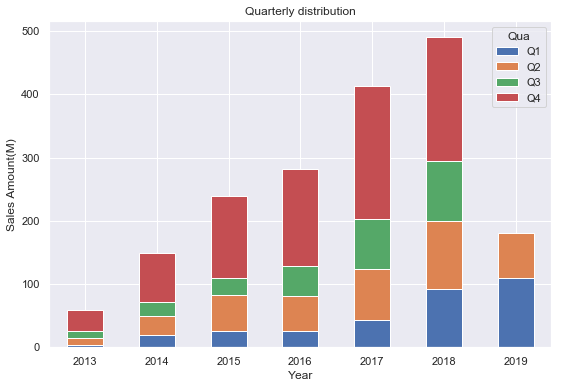

In [48]:
sns.set(rc={'figure.figsize':(9,6)})
ax4 = q9.set_index('Qua').T.plot(kind='bar', stacked=True)
    
plt.xlabel('Year')
plt.ylabel('Sales Amount(M)')
plt.title('Quarterly distribution')

labels=['2013','2014','2015','2016','2017','2018','2019']
ax4.set_xticklabels(labels, rotation=0)

plt.savefig('Quarterly distribution.png')

Monthly Distribution

In [49]:
# Get monthly contribution
#2013
m13 = pd.pivot_table(tf13, index=['month'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
m13 = m13.reset_index()
m13 = m13.fillna(0)
m13['Mon'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

#2014
m14 = pd.pivot_table(tf14, index=['month'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
m14 = m14.reset_index()
m14 = m14.fillna(0)
m14['Mon'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

#2015
m15 = pd.pivot_table(tf15, index=['month'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
m15 = m15.reset_index()
m15 = m15.fillna(0)
m15['Mon'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

#2016
m16 = pd.pivot_table(tf16, index=['month'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
m16 = m16.reset_index()
m16 = m16.fillna(0)
m16['Mon'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

#2017
m17 = pd.pivot_table(tf17, index=['month'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
m17 = m17.reset_index()
m17 = m17.fillna(0)
m17['Mon'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

#2018
m18 = pd.pivot_table(tf18, index=['month'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
m18 = m18.reset_index()
m18 = m18.fillna(0)
m18['Mon'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

#2019
m19 = pd.pivot_table(tf19, index=['month'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
m19 = m19.reset_index()
m19 = m19.fillna(0)
m19['Mon'] = ['Jan','Feb','Mar','Apr','May','Jun']


In [50]:
# Get velue in Million
#2013
m13['2013'] = m13[2013].div(1000000).round(2)
m13['2014'] = m13[2014].div(1000000).round(2)
m13 = m13.drop(['month'],axis=1)

#2014
m14['2014'] = m14[2014].div(1000000).round(2)
m14['2015'] = m14[2015].div(1000000).round(2)
m14 = m14.drop(['month'],axis=1)

#2015
m15['2015'] = m15[2015].div(1000000).round(2)
m15['2016'] = m15[2016].div(1000000).round(2)
m15 = m15.drop(['month'],axis=1)

#2016
m16['2016'] = m16[2016].div(1000000).round(2)
m16['2017'] = m16[2017].div(1000000).round(2)
m16 = m16.drop(['month'],axis=1)

#2017
m17['2017'] = m17[2017].div(1000000).round(2)
m17['2018'] = m17[2018].div(1000000).round(2)
m17 = m17.drop(['month'],axis=1)

#2018
m18['2018'] = m18[2018].div(1000000).round(2)
m18['2019'] = m18[2019].div(1000000).round(2)
m18 = m18.drop(['month'],axis=1)

#2019
m19['2019'] = m19[2019].div(1000000).round(2)
m19 = m19.drop(['month'],axis=1)

In [51]:
m4 = m13.add(m14,fill_value=0)
m4['Mon'] = m4['Mon'].replace({'JanJan':'Jan','FebFeb':'Feb','MarMar':'Mar','AprApr':'Apr','MayMay':'May','JunJun':'Jun',
                              'JulJul':'Jul','AugAug':'Aug','SepSep':'Sep','OctOct':'Oct','NovNov':'Nov','DecDec':'Dec'})

m4 = m4.drop([2013,2014,2015],axis=1)

m15 = m15.drop([2015,2016],axis=1)
m5 = m4.add(m15,fill_value=0)
m5['Mon'] = m5['Mon'].replace({'JanJan':'Jan','FebFeb':'Feb','MarMar':'Mar','AprApr':'Apr','MayMay':'May','JunJun':'Jun',
                              'JulJul':'Jul','AugAug':'Aug','SepSep':'Sep','OctOct':'Oct','NovNov':'Nov','DecDec':'Dec'})

m16 = m16.drop([2016,2017],axis=1)
m6 = m5.add(m16,fill_value=0)
m6['Mon'] = m6['Mon'].replace({'JanJan':'Jan','FebFeb':'Feb','MarMar':'Mar','AprApr':'Apr','MayMay':'May','JunJun':'Jun',
                              'JulJul':'Jul','AugAug':'Aug','SepSep':'Sep','OctOct':'Oct','NovNov':'Nov','DecDec':'Dec'})

m17 = m17.drop([2017,2018],axis=1)
m7 = m6.add(m17,fill_value=0)
m7['Mon'] = m7['Mon'].replace({'JanJan':'Jan','FebFeb':'Feb','MarMar':'Mar','AprApr':'Apr','MayMay':'May','JunJun':'Jun',
                              'JulJul':'Jul','AugAug':'Aug','SepSep':'Sep','OctOct':'Oct','NovNov':'Nov','DecDec':'Dec'})

m18 = m18.drop([2018,2019],axis=1)
m8 = m7.add(m18,fill_value=0)
m8['Mon'] = m8['Mon'].replace({'JanJan':'Jan','FebFeb':'Feb','MarMar':'Mar','AprApr':'Apr','MayMay':'May','JunJun':'Jun',
                              'JulJul':'Jul','AugAug':'Aug','SepSep':'Sep','OctOct':'Oct','NovNov':'Nov','DecDec':'Dec'})

m19 = m19.drop([2019],axis=1)
m = pd.DataFrame([['Jul', 0],['Aug',0],['Sep',0],['Oct',0],['Nov',0],['Dec',0]], columns=['Mon','2019'])
m19 = m19.append(m, ignore_index=True)

m9 = m8.add(m19,fill_value=0)
m9['Mon'] = m9['Mon'].replace({'JanJan':'Jan','FebFeb':'Feb','MarMar':'Mar','AprApr':'Apr','MayMay':'May','JunJun':'Jun',
                              'JulJul':'Jul','AugAug':'Aug','SepSep':'Sep','OctOct':'Oct','NovNov':'Nov','DecDec':'Dec'})

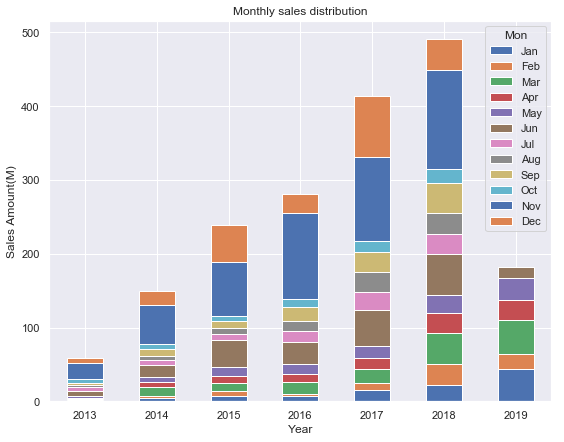

In [52]:
sns.set(rc={'figure.figsize':(9,7)})
ax5 = m9.set_index('Mon').T.plot(kind='bar', stacked=True)

    
plt.xlabel('Year')
plt.ylabel('Sales Amount(M)')
plt.title('Monthly sales distribution')

labels=['2013','2014','2015','2016','2017','2018','2019']
ax5.set_xticklabels(labels, rotation=0)

plt.savefig('Monthly sales distribution.png')

In [53]:
test = m9.melt(id_vars='Mon')
test['time'] = test['year']+' '+test['Mon']


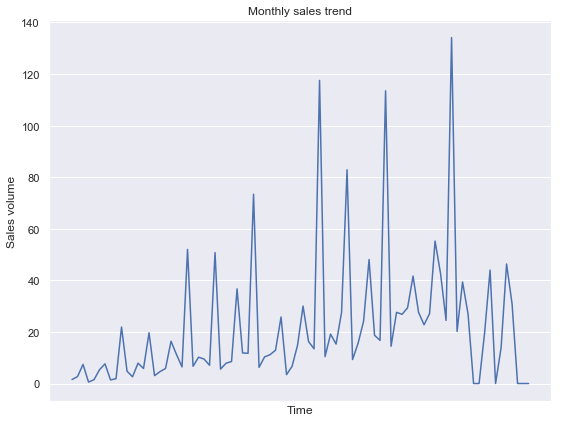

In [54]:
sns.set(rc={'figure.figsize':(9,7)})
axt = sns.lineplot(x='time',y='value',data=test)
plt.xticks([],[])
plt.xlabel('Time')
plt.ylabel('Sales volume')
plt.title('Monthly sales trend')
plt.savefig('monthly sales trend.png')

Yearly Cities-tier Distribution

In [55]:
# Get yearly cities_tier contribution
#2013
ct13 = pd.pivot_table(tf13, index=['cities_tier'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
ct13 = ct13.reset_index()
ct13 = ct13.fillna(0)

ct14 = pd.pivot_table(tf14, index=['cities_tier'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
ct14 = ct14.reset_index()
ct14 = ct14.fillna(0)

ct15 = pd.pivot_table(tf15, index=['cities_tier'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
ct15 = ct15.reset_index()
ct15 = ct15.fillna(0)

ct16 = pd.pivot_table(tf16, index=['cities_tier'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
ct16 = ct16.reset_index()
ct16 = ct16.fillna(0)

ct17 = pd.pivot_table(tf17, index=['cities_tier'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
ct17 = ct17.reset_index()
ct17 = ct17.fillna(0)

ct18 = pd.pivot_table(tf18, index=['cities_tier'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
ct18 = ct18.reset_index()
ct18 = ct18.fillna(0)

ct19 = pd.pivot_table(tf19, index=['cities_tier'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
ct19 = ct19.reset_index()
ct19 = ct19.fillna(0)


In [56]:
# Get velue in Million
#2013
ct13['2013'] = ct13[2013].div(1000000).round(2)
ct13['2014'] = ct13[2014].div(1000000).round(2)

#2014
ct14['2014'] = ct14[2014].div(1000000).round(2)
ct14['2015'] = ct14[2015].div(1000000).round(2)

#2015
ct15['2015'] = ct15[2015].div(1000000).round(2)
ct15['2016'] = ct15[2016].div(1000000).round(2)

#2016
ct16['2016'] = ct16[2016].div(1000000).round(2)
ct16['2017'] = ct16[2017].div(1000000).round(2)

#2017
ct17['2017'] = ct17[2017].div(1000000).round(2)
ct17['2018'] = ct17[2018].div(1000000).round(2)

#2018
ct18['2018'] = ct18[2018].div(1000000).round(2)
ct18['2019'] = ct18[2019].div(1000000).round(2)

#2019
ct19['2019'] = ct19[2019].div(1000000).round(2)

In [57]:
ct13 = ct13.drop([2013,2014],axis=1)
ct14 = ct14.drop([2014,2015],axis=1)
ct13 = ct13.drop([3,5],axis=0)
ct13 = ct13.reset_index()

ct4 = ct13.add(ct14,fill_value=0)
ct4['cities_tier'] = ct4['cities_tier'].replace({'first_tierfirst_tier':'first_tier',
                                                 'new_first_tiernew_first_tier':'new_first_tier',
                                                'second_tiersecond_tier':'second_tier',
                                               'third_tierthird_tier':'third_tier',
                                               'fourth_tierfourth_tier':'fourth_tier',
                                               'fifth_tierfifth_tier':'fifth_tier',
                                               'hongkong_macau_taiwanhongkong_macau_taiwan':'hongkong_macau_taiwan',
                                               'overseasoverseas':'overseas'})



ct15 = ct15.drop([2015,2016],axis=1)
ct15 = ct15.drop([3,5],axis=0)
ct15 = ct15.reset_index()
ct5 = ct4.add(ct15,fill_value=0)
ct5['cities_tier'] = ct5['cities_tier'].replace({'first_tierfirst_tier':'first_tier',
                                                 'new_first_tiernew_first_tier':'new_first_tier',
                                                'second_tiersecond_tier':'second_tier',
                                               'third_tierthird_tier':'third_tier',
                                               'fourth_tierfourth_tier':'fourth_tier',
                                               'fifth_tierfifth_tier':'fifth_tier',
                                               'hongkong_macau_taiwanhongkong_macau_taiwan':'hongkong_macau_taiwan',
                                               'overseasoverseas':'overseas'})

ct16 = ct16.drop([2016,2017],axis=1)
ct16 = ct16.drop([3],axis=0)
ct16 = ct16.reset_index()
ct6 = ct5.add(ct16,fill_value=0)
ct6['cities_tier'] = ct6['cities_tier'].replace({'first_tierfirst_tier':'first_tier',
                                                 'new_first_tiernew_first_tier':'new_first_tier',
                                                'second_tiersecond_tier':'second_tier',
                                               'third_tierthird_tier':'third_tier',
                                               'fourth_tierfourth_tier':'fourth_tier',
                                               'fifth_tierfifth_tier':'fifth_tier',
                                               'hongkong_macau_taiwanhongkong_macau_taiwan':'hongkong_macau_taiwan',
                                               'overseasoverseas':'overseas'})

ct17 = ct17.drop([2017,2018],axis=1)
ct17 = ct17.drop([3],axis=0)
ct17 = ct17.reset_index()
ct7 = ct6.add(ct17,fill_value=0)
ct7['cities_tier'] = ct7['cities_tier'].replace({'first_tierfirst_tier':'first_tier',
                                                 'new_first_tiernew_first_tier':'new_first_tier',
                                                'second_tiersecond_tier':'second_tier',
                                               'third_tierthird_tier':'third_tier',
                                               'fourth_tierfourth_tier':'fourth_tier',
                                               'fifth_tierfifth_tier':'fifth_tier',
                                               'hongkong_macau_taiwanhongkong_macau_taiwan':'hongkong_macau_taiwan',
                                               'overseasoverseas':'overseas'})


ct18 = ct18.drop([2018,2019],axis=1)
ct18 = ct18.drop([3],axis=0)
ct18 = ct18.reset_index()
ct8 = ct7.add(ct18,fill_value=0)
ct8['cities_tier'] = ct8['cities_tier'].replace({'first_tierfirst_tier':'first_tier',
                                                 'new_first_tiernew_first_tier':'new_first_tier',
                                                'second_tiersecond_tier':'second_tier',
                                               'third_tierthird_tier':'third_tier',
                                               'fourth_tierfourth_tier':'fourth_tier',
                                               'fifth_tierfifth_tier':'fifth_tier',
                                               'hongkong_macau_taiwanhongkong_macau_taiwan':'hongkong_macau_taiwan',
                                               'overseasoverseas':'overseas'})

ct19 = ct19.drop([2019],axis=1)
ct19 = ct19.drop([3,5],axis=0)
ct19 = ct19.reset_index()
ct9 = ct8.add(ct19,fill_value=0)
ct9['cities_tier'] = ct9['cities_tier'].replace({'first_tierfirst_tier':'first_tier',
                                                 'new_first_tiernew_first_tier':'new_first_tier',
                                                'second_tiersecond_tier':'second_tier',
                                               'third_tierthird_tier':'third_tier',
                                               'fourth_tierfourth_tier':'fourth_tier',
                                               'fifth_tierfifth_tier':'fifth_tier',
                                               'hongkong_macau_taiwanhongkong_macau_taiwan':'hongkong_macau_taiwan',
                                               'overseasoverseas':'overseas'})


In [58]:
ct9['city'] = [6,1,5,2,3,4]
ct9 = ct9.sort_values(by='city',ascending=True)
ct9= ct9.drop(['index','city'],axis=1)

In [59]:
ct9
#cities number : first_tier: 4; new_first_tier: 15; second_tire: 30; 
# third_tier: 70; fourth_tier: 90; fifth_tier: 128

ct9['cities_count'] = [4,15,30,70,90,128]
ct9
ct = ct9.drop(['cities_count'], axis = 1)

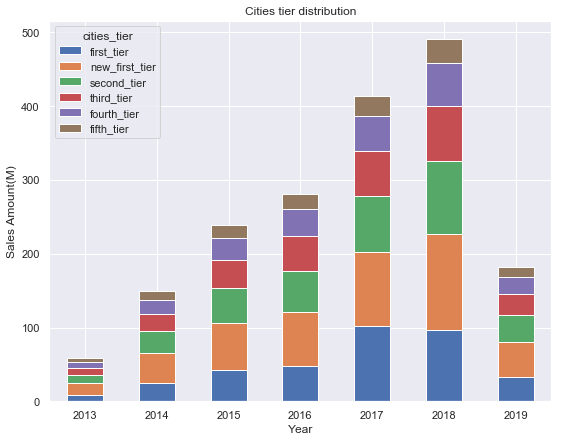

In [60]:
sns.set(rc={'figure.figsize':(9,7)})
ax6 = ct.set_index('cities_tier').T.plot(kind='bar', stacked=True)

    
plt.xlabel('Year')
plt.ylabel('Sales Amount(M)')
plt.title('Cities tier distribution')

labels=['2013','2014','2015','2016','2017','2018','2019']
ax6.set_xticklabels(labels, rotation=0)

plt.savefig('Cities tier distribution.png')

Analyze for Trade_Finished Sales Volume for 3 stores

In [61]:
# Get yearly shop contribution
#2013
s13 = pd.pivot_table(tf13, index=['shop_id'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
s13 = s13.reset_index()
s13 = s13.fillna(0)

#2014
s14 = pd.pivot_table(tf14, index=['shop_id'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
s14 = s14.reset_index()
s14 = s14.fillna(0)


#2015
s15 = pd.pivot_table(tf15, index=['shop_id'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
s15 = s15.reset_index()
s15 = s15.fillna(0)


#2016
s16 = pd.pivot_table(tf16, index=['shop_id'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
s16 = s16.reset_index()
s16 = s16.fillna(0)


#2017
s17 = pd.pivot_table(tf17, index=['shop_id'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
s17 = s17.reset_index()
s17 = s17.fillna(0)


#2018
s18 = pd.pivot_table(tf18, index=['shop_id'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
s18 = s18.reset_index()
s18 = s18.fillna(0)


#2019
s19 = pd.pivot_table(tf19, index=['shop_id'], columns=['year'], values = 'payment_post_fee', aggfunc=np.sum)
s19 = s19.reset_index()
s19 = s19.fillna(0)



In [62]:
# Schwarzkopf (14)
sc13 = s13[s13['shop_id']==14]
sc14 = s14[s14['shop_id']==14]
sc15 = s15[s15['shop_id']==14]
sc16 = s16[s16['shop_id']==14]
sc17 = s17[s17['shop_id']==14]
sc18 = s18[s18['shop_id']==14]
sc19 = s19[s19['shop_id']==14]

In [63]:
# Henkel (90)

h13 = s13[s13['shop_id']==90]
h14 = s14[s14['shop_id']==90]
h15 = s15[s15['shop_id']==90]
h16 = s16[s16['shop_id']==90]
h17 = s17[s17['shop_id']==90]
h18 = s18[s18['shop_id']==90]
h19 = s19[s19['shop_id']==90]

In [64]:
# Fesili (142)

f13 = s13[s13['shop_id']==142]
f14 = s14[s14['shop_id']==142]
f15 = s15[s15['shop_id']==142]
f16 = s16[s16['shop_id']==142]
f17 = s17[s17['shop_id']==142]
f18 = s18[s18['shop_id']==142]
f19 = s19[s19['shop_id']==142]

In [65]:
# Schwarzkopf (14)
sc4 = sc13.add(sc14,fill_value=0)
sc5 = sc4.add(sc15,fill_value=0)
sc6 = sc5.add(sc16,fill_value=0)
sc7 = sc6.add(sc17,fill_value=0)
sc8 = sc7.add(sc18,fill_value=0)
sc9 = sc8.add(sc19,fill_value=0)

In [66]:
# Schwarzkopf (14)
sc9['shop_id']= sc9['shop_id'].replace({98:14})

In [67]:
# Schwarzkopf (14)
sc9['2013'] = sc9[2013].div(1000000).round(2)
sc9['2014'] = sc9[2014].div(1000000).round(2)
sc9['2015'] = sc9[2015].div(1000000).round(2)
sc9['2016'] = sc9[2016].div(1000000).round(2)
sc9['2017'] = sc9[2017].div(1000000).round(2)
sc9['2018'] = sc9[2018].div(1000000).round(2)
sc9['2019'] = sc9[2019].div(1000000).round(2)

sc9 = sc9.drop([2013,2014,2015,2016,2017,2018,2019],axis=1)


In [68]:
# Henkel (90)
h4 = h13.add(h14,fill_value=0)
h5 = h4.add(h15,fill_value=0)
h6 = h5.add(h16,fill_value=0)
h7 = h6.add(h17,fill_value=0)
h8 = h7.add(h18,fill_value=0)
h9 = h8.add(h19,fill_value=0)
h9 = h9.fillna(0)

In [69]:
h9['shop_id']= h9['shop_id'].replace({450:90})

In [70]:
# Henkel (90)
h9['2013'] = h9[2013].div(1000000).round(2)
h9['2014'] = h9[2014].div(1000000).round(2)
h9['2015'] = h9[2015].div(1000000).round(2)
h9['2016'] = h9[2016].div(1000000).round(2)
h9['2017'] = h9[2017].div(1000000).round(2)
h9['2018'] = h9[2018].div(1000000).round(2)
h9['2019'] = h9[2019].div(1000000).round(2)

h9 = h9.drop([2013,2014,2015,2016,2017,2018,2019],axis=1)

In [71]:
# Fesili (142)
f4 = f13.add(f14,fill_value=0)
f5 = f4.add(f15,fill_value=0)
f6 = f5.add(f16,fill_value=0)
f7 = f6.add(f17,fill_value=0)
f8 = f7.add(f18,fill_value=0)
f9 = f8.add(f19,fill_value=0)
f9 = f9.fillna(0)


In [72]:
# Fesili (142)
f9['2013'] = f9[2013].div(1000000).round(2)
f9['2014'] = f9[2014].div(1000000).round(2)
f9['2015'] = f9[2015].div(1000000).round(2)
f9['2016'] = f9[2016].div(1000000).round(2)
f9['2017'] = f9[2017].div(1000000).round(2)
f9['2018'] = f9[2018].div(1000000).round(2)
f9['2019'] = f9[2019].div(1000000).round(2)

f9 = f9.drop([2013,2014,2015,2016,2017,2018,2019],axis=1)


In [73]:
f9['shop_id']= f9['shop_id'].replace({426:142})

In [74]:
fo9 = pd.concat([sc9,h9,f9])

In [75]:
fo9

year,shop_id,2013,2014,2015,2016,2017,2018,2019
0,14.0,59.16,149.7,239.47,275.79,391.61,442.35,161.55
1,90.0,0.00,0.0,0.00,5.82,10.45,15.33,4.05
2,142.0,0.00,0.0,0.00,0.00,11.55,33.52,15.78


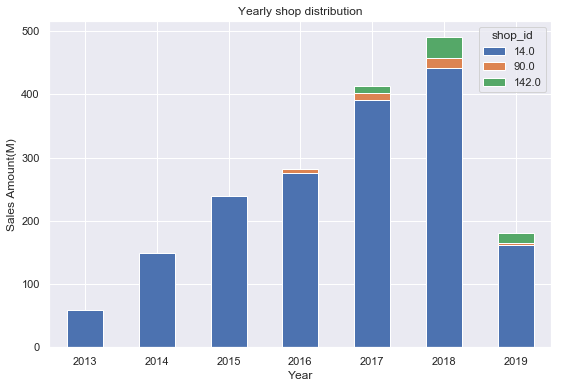

In [76]:
sns.set(rc={'figure.figsize':(9,6)})
ax2 = fo9.set_index('shop_id').T.plot(kind='bar', stacked=True)
    
plt.xlabel('Year')
plt.ylabel('Sales Amount(M)')
plt.title('Yearly shop distribution')

labels=['2013','2014','2015','2016','2017','2018','2019']
ax2.set_xticklabels(labels, rotation=0)

plt.savefig('Yearly shop distribution.png')

Yearly sales volume increment trend by shop

In [77]:
schwarzkopf = sc9.T
schwarzkopf = schwarzkopf.drop(['shop_id'],axis=0)
schwarzkopf = schwarzkopf.reset_index()
schwarzkopf.columns = ['year','sales']
schwarzkopf['pct'] = schwarzkopf[['sales']].pct_change()[:7] * 100
schwarzkopf = schwarzkopf.drop([0,6],axis=0)
schwarzkopf

,year,sales,pct
1,2014,149.70,153.042596
2,2015,239.47,59.966600
3,2016,275.79,15.166827
4,2017,391.61,41.995721
5,2018,442.35,12.956768


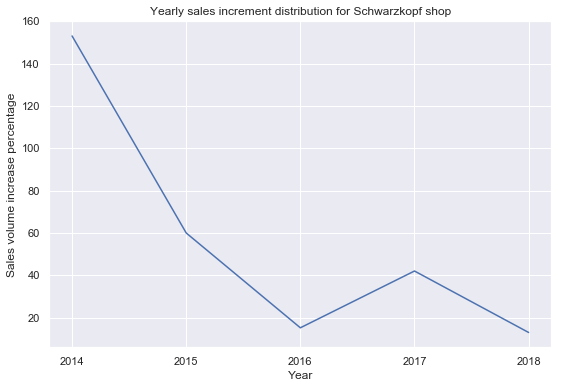

In [78]:
axs = sns.lineplot(x="year", y="pct", data=schwarzkopf)

plt.xlabel('Year')
plt.ylabel('Sales volume increase percentage')
plt.title('Yearly sales increment distribution for Schwarzkopf shop')
plt.savefig('Yearly sales increment rate for Schwarzkopf shop.png')

In [79]:
henkel = h9.T
henkel = henkel.drop(['shop_id'],axis=0)
henkel = henkel.reset_index()
henkel.columns = ['year','sales']
henkel['pct'] = henkel[['sales']].pct_change()[:7] * 100
henkel = henkel.drop([6],axis=0)
henkel

,year,sales,pct
0,2013,0.00,NaN
1,2014,0.00,NaN
2,2015,0.00,NaN
3,2016,5.82,inf
4,2017,10.45,79.553265
5,2018,15.33,46.698565


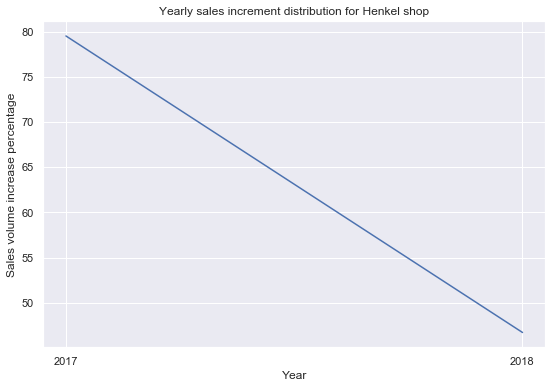

In [80]:
axh = sns.lineplot(x="year", y="pct", data=henkel)

plt.xlabel('Year')
plt.ylabel('Sales volume increase percentage')
plt.title('Yearly sales increment distribution for Henkel shop')
plt.savefig('Yearly sales increment rate for Henkel shop.png')

In [81]:
fesili = f9.T
fesili = fesili.drop(['shop_id'],axis=0)
fesili = fesili.reset_index()
fesili.columns = ['year','sales']
fesili['pct'] = fesili[['sales']].pct_change()[:7] * 100
fesili = fesili.drop([6],axis=0)
fesili

,year,sales,pct
0,2013,0.00,NaN
1,2014,0.00,NaN
2,2015,0.00,NaN
3,2016,0.00,NaN
4,2017,11.55,inf
5,2018,33.52,190.21645


## Customer and Product

####Customer

Focus on Schwarzkopf shop

In [82]:
# Steps below:
# 1. Remove the transaction record not relevant to real sales
# 2. Assign Product label
# 3. Assign Line label
# 4. Assign Campaign label
# 5. Focus on custoemr who purchased 3 times and above
# final clean version: f13-f19

In [83]:
#Remove the transaction record not relevant to real sales
def data_cleaning1(df):
    #select only schwarzkopf flag store
    df = df.loc[df['shop_id']==14]
    #remove vouchers
    df = df.loc[~df['title'].str.contains('店铺优惠券|不要乱拍，详情联系客服|入会会员积分兑换|朱一龙限量签名海报|补邮费|预售尾款专用')]
    return df

In [84]:
cl13 = data_cleaning1(tf13)
cl14 = data_cleaning1(tf14)
cl15 = data_cleaning1(tf15)
cl16 = data_cleaning1(tf16)
cl17 = data_cleaning1(tf17)
cl18 = data_cleaning1(tf18)
cl19 = data_cleaning1(tf19)

In [197]:
#Assign product label to transaction record
def product_1(df):
    df['product'] = np.where(df['title'].str.contains('羊绒脂'), "yangrongzhi",'others' )
    df['product'] = np.where(df['title'].str.contains('多效'), "duoxiao", df['product'] )
    df['product'] = np.where(df['title'].str.contains('金致'), "jinzhi",df['product'])
    df['product'] = np.where(df['title'].str.contains('黑金'), "heijin",df['product'])
    df['product'] = np.where(df['title'].str.contains('水凝'), "heijin",df['product'])
    df['product'] = np.where(df['title'].str.contains('泡泡染'), "paopaoran",df['product'] )
    df['product'] = np.where(df['title'].str.contains('怡然'), "yiran",df['product'] )
    df['product'] = np.where(df['title'].str.contains('8金'), "8jin",df['product'] )
    df['product'] = np.where(df['title'].str.contains('赋芮|Beology|beology'), "furui",df['product'] )
    df['product'] = np.where(df['title'].str.contains('睡莲'), "shuilian",df['product'] )
    df['product'] = np.where(df['title'].str.contains('Got2b|got2b'), "got2b",df['product'] )
    df['product'] = np.where(df['title'].str.contains('酷印'), "kuyin",df['product'] )
    df['product'] = np.where(df['title'].str.contains('芍药'), "shaoyao",df['product'] )
    df['product'] = np.where(df['title'].str.contains('薄荷'), "bohe",df['product'] )
    df['product'] = np.where(df['title'].str.contains('雏菊'), "chuju",df['product'] )
    df['product'] = np.where(df['title'].str.contains('幻彩'),'huancai',df['product'])
    df['product'] = np.where(df['title'].str.contains('辣木籽'),'lamuzi',df['product'])
    df['product'] = np.where(df['title'].str.contains('小富瓶'),'xiaofuping',df['product'])
    df['product'] = np.where(df['title'].str.contains('无硅油'), "wuguiyou",df['product'])
    
    
    return df

In [198]:
p113 = product_1(cl13)
p114 = product_1(cl14)
p115 = product_1(cl15)
p116 = product_1(cl16)
p117 = product_1(cl17)
p118 = product_1(cl18)
p119 = product_1(cl19)

In [200]:
p115['product'].value_counts()

duoxiao        520006
others         309709
yiran          295819
yangrongzhi    241358
heijin         239911
shuilian       215954
jinzhi          89700
got2b           45073
8jin            33844
wuguiyou        21469
kuyin           19060
huancai         10899
paopaoran        9049
bohe             5483
Name: product, dtype: int64

In [201]:
#Assign product label to transaction record
def product_2(df):
    df['yangrongzhi'] = np.where(df['title'].str.contains('羊绒脂'), 1,0 )
    df['duoxiao'] = np.where(df['title'].str.contains('多效'), 1,0 )
    df['jinzhi'] = np.where(df['title'].str.contains('金致'), 1,0 )
    df['heijin'] = np.where(df['title'].str.contains('黑金'), 1,0 )
    df['shuining'] = np.where(df['title'].str.contains('水凝'), 1,0)
    df['paopaoran'] = np.where(df['title'].str.contains('泡泡染'), 1,0 )
    df['yiran'] = np.where(df['title'].str.contains('怡然'), 1,0 )
    df['8jin'] = np.where(df['title'].str.contains('8金'), 1,0 )
    df['furui'] = np.where(df['title'].str.contains('赋芮'), 1,0 )
    df['shuilian'] = np.where(df['title'].str.contains('睡莲'), 1,0 )
    df['got2b'] = np.where(df['title'].str.contains('Got2b|got2b'), 1,0 )
    df['kuyin'] = np.where(df['title'].str.contains('酷印'), 1,0 )
    df['shaoyao'] = np.where(df['title'].str.contains('芍药'), 1,0 )
    df['bohe'] = np.where(df['title'].str.contains('薄荷'), 1,0 )
    df['chuju'] = np.where(df['title'].str.contains('雏菊'), 1,0 )
    df['huancai'] = np.where(df['title'].str.contains('幻彩'),1,0)
    df['lamuzi'] = np.where(df['title'].str.contains('辣木籽'),1,0)
    df['xiaofuping'] = np.where(df['title'].str.contains('小富瓶'),1,0)
    df['wuguiyou'] = np.where(df['title'].str.contains('无硅油'), 1,0)
    
    return df

In [202]:
p213 = product_2(p113)
p214 = product_2(p114)
p215 = product_2(p115)
p216 = product_2(p116)
p217 = product_2(p117)
p218 = product_2(p118)
p219 = product_2(p119)

In [203]:
p215['bohe'].value_counts()

0    2051851
1       5483
Name: bohe, dtype: int64

In [206]:
#Assign line label to transaction record
def line_1(df):

    df['coloring'] = np.where(df['title'].str.contains('染发|泡泡|怡然'), 1,0)
    df['wash'] = np.where(df['title'].str.contains('洗护|洗发水|多效修护|旅行装|洗发露|修护套装|套装|洗发润发|洗润礼盒洗发|洗|清屑|净屑'), 1,0 )
    df['condition'] = np.where(df['title'].str.contains('精华液|发膜|精油|营养液|精华乳|润发乳|营养水|精华素|护发补水修护|护发霜|精粹保湿喷雾|净发慕斯|护发素|护发补水保湿|净透冻膜喷雾|晶露喷雾|护发'),
                          1,0 )
    df['style'] = np.where(df['title'].str.contains('造型|Got2b|got2b|发泥|弹力素|发胶'), 1,0)
    
    return df

In [207]:
l113 = line_1(p213)
l114 = line_1(p214)
l115 = line_1(p215)
l116 = line_1(p216)
l117 = line_1(p217)
l118 = line_1(p218)
l119 = line_1(p219)

In [208]:
#Assign line label to transaction record
def line_2(df):

    df['line'] = np.where(df['title'].str.contains('染发|泡泡|怡然'), "coloring",'others')
    df['line'] = np.where(df['title'].str.contains('洗护|洗发水|多效修护|旅行装|洗发露|修护套装|套装|洗发润发|洗润礼盒|洗发|洗|清屑|净屑'), "wash",df['line'] )
    df['line'] = np.where(df['title'].str.contains('精华液|发膜|精油|营养液|精华乳|润发乳|营养水|精华素|护发补水修护|护发霜|精粹保湿喷雾|净发慕斯|护发素|护发补水保湿|净透冻膜喷雾|晶露喷雾|护发'),
                          "condition",df['line'] )
    df['line'] = np.where(df['title'].str.contains('造型|Got2b|got2b|发泥|弹力素|发胶'), "style",df['line'] )
    
    return df

In [209]:
l213 = line_2(l113)
l214 = line_2(l114)
l215 = line_2(l115)
l216 = line_2(l116)
l217 = line_2(l117)
l218 = line_2(l118)
l219 = line_2(l119)

In [210]:
#pd.Timestamp.timetuple(datetime.datetime(2017,11,11)).tm_yday

In [211]:
##Assign campaign label(6.18; 11.11; others) to transaction record
def camp_13(df):
 
    start1111 = datetime.datetime.strptime('2013-10-20 00:00:00', '%Y-%m-%d %H:%M:%S')
    end1111 = datetime.datetime.strptime('2013-11-12 00:00:00', '%Y-%m-%d %H:%M:%S')
    df['campaign'] = np.where((df['created']>=start1111)&(df['created']<=end1111),"1111",'others')
    return df

In [212]:
##Assign campaign label(6.18; 11.11; others) to transaction record
def camp_14(df):
 
    start1111 = datetime.datetime.strptime('2014-10-20 00:00:00', '%Y-%m-%d %H:%M:%S')
    end1111 = datetime.datetime.strptime('2014-11-12 00:00:00', '%Y-%m-%d %H:%M:%S')
    df['campaign'] = np.where((df['created']>=start1111)&(df['created']<=end1111),"1111",'others')
    return df

In [213]:
##Assign campaign label(6.18; 11.11; others) to transaction record
def camp_15(df):
 
    start1111 = datetime.datetime.strptime('2015-10-20 00:00:00', '%Y-%m-%d %H:%M:%S')
    end1111 = datetime.datetime.strptime('2015-11-12 00:00:00', '%Y-%m-%d %H:%M:%S')
    df['campaign'] = np.where((df['created']>=start1111)&(df['created']<=end1111),"1111",'others')
    return df

In [214]:
##Assign campaign label(6.18; 11.11; others) to transaction record
def camp_16(df):
 
    start1111 = datetime.datetime.strptime('2016-10-20 00:00:00', '%Y-%m-%d %H:%M:%S')
    end1111 = datetime.datetime.strptime('2016-11-12 00:00:00', '%Y-%m-%d %H:%M:%S')
    start618 = datetime.datetime.strptime('2016-06-01 00:00:00', '%Y-%m-%d %H:%M:%S')
    end618 = datetime.datetime.strptime('2016-06-19 00:00:00', '%Y-%m-%d %H:%M:%S')
    df['campaign'] = np.where((df['created']>=start1111)&(df['created']<=end1111),"1111",'others')
    df['campaign'] = np.where((df['created']>=start618)&(df['created']<=end618),"618",df['campaign'])
    return df

In [215]:
##Assign campaign label(6.18; 11.11; others) to transaction record
def camp_17(df):
 
    start1111 = datetime.datetime.strptime('2017-10-20 00:00:00', '%Y-%m-%d %H:%M:%S')
    end1111 = datetime.datetime.strptime('2017-11-12 00:00:00', '%Y-%m-%d %H:%M:%S')
    start618 = datetime.datetime.strptime('2017-06-01 00:00:00', '%Y-%m-%d %H:%M:%S')
    end618 = datetime.datetime.strptime('2017-06-19 00:00:00', '%Y-%m-%d %H:%M:%S')
    df['campaign'] = np.where((df['created']>=start1111)&(df['created']<=end1111),"1111",'others')
    df['campaign'] = np.where((df['created']>=start618)&(df['created']<=end618),"618",df['campaign'])
    return df

In [216]:
##Assign campaign label(6.18; 11.11; others) to transaction record
def camp_18(df):
 
    start1111 = datetime.datetime.strptime('2018-10-20 00:00:00', '%Y-%m-%d %H:%M:%S')
    end1111 = datetime.datetime.strptime('2018-11-12 00:00:00', '%Y-%m-%d %H:%M:%S')
    start618 = datetime.datetime.strptime('2018-06-01 00:00:00', '%Y-%m-%d %H:%M:%S')
    end618 = datetime.datetime.strptime('2018-06-19 00:00:00', '%Y-%m-%d %H:%M:%S')
    df['campaign'] = np.where((df['created']>=start1111)&(df['created']<=end1111),"1111",'others')
    df['campaign'] = np.where((df['created']>=start618)&(df['created']<=end618),"618",df['campaign'])
    return df

In [217]:
##Assign campaign label(6.18; 11.11; others) to transaction record
def camp_19(df):
 
    start1111 = datetime.datetime.strptime('2019-10-20 00:00:00', '%Y-%m-%d %H:%M:%S')
    end1111 = datetime.datetime.strptime('2019-11-12 00:00:00', '%Y-%m-%d %H:%M:%S')
    start618 = datetime.datetime.strptime('2019-06-01 00:00:00', '%Y-%m-%d %H:%M:%S')
    end618 = datetime.datetime.strptime('2019-06-19 00:00:00', '%Y-%m-%d %H:%M:%S')
    df['campaign'] = np.where((df['created']>=start1111)&(df['created']<=end1111),"1111",'others')
    df['campaign'] = np.where((df['created']>=start618)&(df['created']<=end618),"618",df['campaign'])
    return df

In [218]:
ca13 = camp_13(l213)
ca14 = camp_14(l214)
ca15 = camp_15(l215)
ca16 = camp_16(l216)
ca17 = camp_17(l217)
ca18 = camp_18(l218)
ca19 = camp_19(l219)

In [219]:
#Get the key product and line

#2013
ca13['l_sum']= ca13[['coloring','wash','condition','style']].sum(axis=1)
ca13['p_sum']= ca13[['yangrongzhi','duoxiao','jinzhi','heijin','shuining','paopaoran','yiran','8jin',
                      'furui','shuilian','got2b','kuyin','shaoyao','bohe','chuju','wuguiyou','xiaofuping',
                  'huancai','lamuzi']].sum(axis=1)
    
    
#2014
ca14['l_sum']= ca14[['coloring','wash','condition','style']].sum(axis=1)
ca14['p_sum']= ca14[['yangrongzhi','duoxiao','jinzhi','heijin','shuining','paopaoran','yiran','8jin',
                      'furui','shuilian','got2b','kuyin','shaoyao','bohe','chuju','wuguiyou','xiaofuping',
                  'huancai','lamuzi']].sum(axis=1)


#2015
ca15['l_sum']= ca15[['coloring','wash','condition','style']].sum(axis=1)
ca15['p_sum']= ca15[['yangrongzhi','duoxiao','jinzhi','heijin','shuining','paopaoran','yiran','8jin',
                      'furui','shuilian','got2b','kuyin','shaoyao','bohe','chuju','wuguiyou','xiaofuping',
                  'huancai','lamuzi']].sum(axis=1)


#2016
ca16['l_sum']= ca16[['coloring','wash','condition','style']].sum(axis=1)
ca16['p_sum']= ca16[['yangrongzhi','duoxiao','jinzhi','heijin','shuining','paopaoran','yiran','8jin',
                      'furui','shuilian','got2b','kuyin','shaoyao','bohe','chuju','wuguiyou','xiaofuping',
                  'huancai','lamuzi']].sum(axis=1)


#2017
ca17['l_sum']= ca17[['coloring','wash','condition','style']].sum(axis=1)
ca17['p_sum']= ca17[['yangrongzhi','duoxiao','jinzhi','heijin','shuining','paopaoran','yiran','8jin',
                      'furui','shuilian','got2b','kuyin','shaoyao','bohe','chuju','wuguiyou','xiaofuping',
                  'huancai','lamuzi']].sum(axis=1)


#2018
ca18['l_sum']= ca18[['coloring','wash','condition','style']].sum(axis=1)
ca18['p_sum']= ca18[['yangrongzhi','duoxiao','jinzhi','heijin','shuining','paopaoran','yiran','8jin',
                      'furui','shuilian','got2b','kuyin','shaoyao','bohe','chuju','wuguiyou','xiaofuping',
                  'huancai','lamuzi']].sum(axis=1)

#2019
ca19['l_sum']= ca19[['coloring','wash','condition','style']].sum(axis=1)
ca19['p_sum']= ca19[['yangrongzhi','duoxiao','jinzhi','heijin','shuining','paopaoran','yiran','8jin',
                      'furui','shuilian','got2b','kuyin','shaoyao','bohe','chuju','wuguiyou','xiaofuping',
                  'huancai','lamuzi']].sum(axis=1)
    

In [220]:
#Remove items with no line label
ca13 = ca13[ca13['l_sum'] > 0]
ca14 = ca14[ca14['l_sum'] > 0]
ca15 = ca15[ca15['l_sum'] > 0]
ca16 = ca16[ca16['l_sum'] > 0]
ca17 = ca17[ca17['l_sum'] > 0]
ca18 = ca18[ca18['l_sum'] > 0]
ca19 = ca19[ca19['l_sum'] > 0]

In [221]:
#Get the customers' list purchase 3 times per year for every year

#2013
du13 = pd.DataFrame(ca13['buyer_nick'].value_counts())
du13 = du13.loc[du13['buyer_nick']>=3].reset_index()
f13 = ca13.loc[ca13['buyer_nick'].isin(du13['index'])]

#2014
du14 = pd.DataFrame(ca14['buyer_nick'].value_counts())
du14 = du14.loc[du14['buyer_nick']>=3].reset_index()
f14 = ca14.loc[ca14['buyer_nick'].isin(du14['index'])]

#2015
du15 = pd.DataFrame(ca15['buyer_nick'].value_counts())
du15 = du15.loc[du15['buyer_nick']>=3].reset_index()
f15 = ca15.loc[ca15['buyer_nick'].isin(du15['index'])]

#2016
du16 = pd.DataFrame(ca16['buyer_nick'].value_counts())
du16 = du16.loc[du16['buyer_nick']>=3].reset_index()
f16 = ca16.loc[ca16['buyer_nick'].isin(du16['index'])]

#2017
du17 = pd.DataFrame(ca17['buyer_nick'].value_counts())
du17 = du17.loc[du17['buyer_nick']>=3].reset_index()
f17 = ca17.loc[ca17['buyer_nick'].isin(du17['index'])]

#2018
du18 = pd.DataFrame(ca18['buyer_nick'].value_counts())
du18 = du18.loc[du18['buyer_nick']>=3].reset_index()
f18 = ca18.loc[ca18['buyer_nick'].isin(du18['index'])]

#2013
du19 = pd.DataFrame(ca19['buyer_nick'].value_counts())
du19 = du19.loc[du19['buyer_nick']>=3].reset_index()
f19 = ca19.loc[ca19['buyer_nick'].isin(du19['index'])]

Below analysis all target the customer purchased 3 times and above as focus group

In [222]:
# Approach below:
# 1. Value per order (df13-df19)
# 2. Mean, min and max duration between pay time and created time(Seconds)(cb13-cb19)
# 3. First, second purchase date and time difference in between(p13-p19)
# 4. Average purchase rate per year(mr)
# 5.1 mean end_time - created (es13-es19)
# 5.2 mean end_time -  pay_time (ep13-ep19)
# 6. trade from summary(trade13-trade19)
# 7. discount rate(df13-df19)


In [223]:
##### Get value per order
#2013
df13 = f13[['payment_post_fee']].groupby(f13['buyer_nick']).sum()
df13 = df13.reset_index()
b13 = f13[['count']].groupby(f13['buyer_nick']).count()
b13 = b13.reset_index()
df13 = df13.merge(b13, on = 'buyer_nick')
df13['price_per_order'] = round(df13['payment_post_fee']/df13['count'],2)

#2014
df14 = f14[['payment_post_fee']].groupby(f14['buyer_nick']).sum()
df14 = df14.reset_index()
b14 = f14[['count']].groupby(f14['buyer_nick']).count()
b14 = b14.reset_index()
df14 = df14.merge(b14, on = 'buyer_nick')
df14['price_per_order'] = round(df14['payment_post_fee']/df14['count'],2)

#2015
df15 = f15[['payment_post_fee']].groupby(f15['buyer_nick']).sum()
df15 = df15.reset_index()
b15 = f15[['count']].groupby(f15['buyer_nick']).count()
b15 = b15.reset_index()
df15 = df15.merge(b15, on = 'buyer_nick')
df15['price_per_order'] = round(df15['payment_post_fee']/df15['count'],2)

#2016
df16 = f16[['payment_post_fee']].groupby(f16['buyer_nick']).sum()
df16 = df16.reset_index()
b16 = f16[['count']].groupby(f16['buyer_nick']).count()
b16 = b16.reset_index()
df16 = df16.merge(b16, on = 'buyer_nick')
df16['price_per_order'] = round(df16['payment_post_fee']/df16['count'],2)

#2017
df17 = f17[['payment_post_fee']].groupby(f17['buyer_nick']).sum()
df17 = df17.reset_index()
b17 = f17[['count']].groupby(f17['buyer_nick']).count()
b17 = b17.reset_index()
df17 = df17.merge(b17, on = 'buyer_nick')
df17['price_per_order'] = round(df17['payment_post_fee']/df17['count'],2)

#2018
df18 = f18[['payment_post_fee']].groupby(f18['buyer_nick']).sum()
df18 = df18.reset_index()
b18 = f18[['count']].groupby(f18['buyer_nick']).count()
b18 = b18.reset_index()
df18 = df18.merge(b18, on = 'buyer_nick')
df18['price_per_order'] = round(df18['payment_post_fee']/df18['count'],2)

#2019
df19 = f19[['payment_post_fee']].groupby(f19['buyer_nick']).sum()
df19 = df19.reset_index()
b19 = f19[['count']].groupby(f19['buyer_nick']).count()
b19 = b19.reset_index()
df19 = df19.merge(b19, on = 'buyer_nick')
df19['price_per_order'] = round(df19['payment_post_fee']/df19['count'],2)

In [224]:
### Get the duration between pay_time and created 

f13['duration'] = f13['pay_time'] - f13['created']
f14['duration'] = f14['pay_time'] - f14['created']
f15['duration'] = f15['pay_time'] - f15['created']
f16['duration'] = f16['pay_time'] - f16['created']
f17['duration'] = f17['pay_time'] - f17['created']
f18['duration'] = f18['pay_time'] - f18['created']
f19['duration'] = f19['pay_time'] - f19['created']


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [225]:
#Convert to seconds
f13['duration'] = f13['duration'].dt.total_seconds()
f14['duration'] = f14['duration'].dt.total_seconds()
f15['duration'] = f15['duration'].dt.total_seconds()
f16['duration'] = f16['duration'].dt.total_seconds()
f17['duration'] = f17['duration'].dt.total_seconds()
f18['duration'] = f18['duration'].dt.total_seconds()
f19['duration'] = f19['duration'].dt.total_seconds()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [226]:
# Mean duration for payment(Seconds)

mean13 = (f13.groupby(['buyer_nick'], as_index=False).mean().groupby('buyer_nick')['duration'].mean())
mean13 = pd.DataFrame(mean13)
mean13 = mean13.reset_index()
mean13['duration'] = round(mean13['duration'],2)

mean14 = (f14.groupby(['buyer_nick'], as_index=False).mean().groupby('buyer_nick')['duration'].mean())
mean14 = pd.DataFrame(mean14)
mean14 = mean14.reset_index()
mean14['duration'] = round(mean14['duration'],2)

mean15 = (f15.groupby(['buyer_nick'], as_index=False).mean().groupby('buyer_nick')['duration'].mean())
mean15 = pd.DataFrame(mean15)
mean15 = mean15.reset_index()
mean15['duration'] = round(mean15['duration'],2)

mean16 = (f16.groupby(['buyer_nick'], as_index=False).mean().groupby('buyer_nick')['duration'].mean())
mean16 = pd.DataFrame(mean16)
mean16 = mean16.reset_index()
mean16['duration'] = round(mean16['duration'],2)

mean17 = (f17.groupby(['buyer_nick'], as_index=False).mean().groupby('buyer_nick')['duration'].mean())
mean17 = pd.DataFrame(mean17)
mean17 = mean17.reset_index()
mean17['duration'] = round(mean17['duration'],2)

mean18 = (f18.groupby(['buyer_nick'], as_index=False).mean().groupby('buyer_nick')['duration'].mean())
mean18 = pd.DataFrame(mean18)
mean18 = mean18.reset_index()
mean18['duration'] = round(mean18['duration'],2)

mean19 = (f19.groupby(['buyer_nick'], as_index=False).mean().groupby('buyer_nick')['duration'].mean())
mean19 = pd.DataFrame(mean19)
mean19 = mean19.reset_index()
mean19['duration'] = round(mean19['duration'],2)

In [227]:
#mean13

In [228]:
# Max duration for payment(Seconds)

max13 = f13.sort_values('duration', ascending=False).drop_duplicates(['buyer_nick'])
max13 = max13[['buyer_nick','duration']]
#max13 = pd.DataFrame(max13)
#max13 = max13.reset_index()
max13['duration'] = round(max13['duration'],2)

max14 = f14.sort_values('duration', ascending=False).drop_duplicates(['buyer_nick'])
max14 = max14[['buyer_nick','duration']]
#max14 = pd.DataFrame(max14)
#max14 = max14.reset_index()
max14['duration'] = round(max14['duration'],2)

max15 = f15.sort_values('duration', ascending=False).drop_duplicates(['buyer_nick'])
max15 = max15[['buyer_nick','duration']]
#max15 = pd.DataFrame(max15)
#max15 = max15.reset_index()
max15['duration'] = round(max15['duration'],2)

max16 = f16.sort_values('duration', ascending=False).drop_duplicates(['buyer_nick'])
max16 = max16[['buyer_nick','duration']]
#max16 = pd.DataFrame(max16)
#max16 = max16.reset_index()
max16['duration'] = round(max16['duration'],2)

max17 = f17.sort_values('duration', ascending=False).drop_duplicates(['buyer_nick'])
max17 = max17[['buyer_nick','duration']]
#max17 = pd.DataFrame(max17)
#max17 = max17.reset_index()
max17['duration'] = round(max17['duration'],2)

max18 = f18.sort_values('duration', ascending=False).drop_duplicates(['buyer_nick'])
max18 = max18[['buyer_nick','duration']]
#max18 = pd.DataFrame(max18)
#max18 = max18.reset_index()
max18['duration'] = round(max18['duration'],2)

max19 = f19.sort_values('duration', ascending=False).drop_duplicates(['buyer_nick'])
max19 = max19[['buyer_nick','duration']]
#max19 = pd.DataFrame(max19)
#max19 = max19.reset_index()
max19['duration'] = round(max19['duration'],2)

In [229]:
#max13

In [230]:
# Min duration for payment(Seconds)

min13 = f13.sort_values('duration').groupby('buyer_nick', as_index = False).first()
min13 = min13[['buyer_nick','duration']]
#min13 = pd.DataFrame(min13)
#min13 = min13.reset_index()
min13['duration'] = round(min13['duration'],2)


min14 = f14.sort_values('duration').groupby('buyer_nick', as_index = False).first()
min14 = min14[['buyer_nick','duration']]
#min14 = pd.DataFrame(min14)
#min14 = min14.reset_index()
min14['duration'] = round(min14['duration'],2)


min15 = f15.sort_values('duration').groupby('buyer_nick', as_index = False).first()
min15 = min15[['buyer_nick','duration']]
#min15 = pd.DataFrame(min15)
#min15 = min15.reset_index()
min15['duration'] = round(min15['duration'],2)


min16 = f16.sort_values('duration').groupby('buyer_nick', as_index = False).first()
min16 = min16[['buyer_nick','duration']]
#min16 = pd.DataFrame(min16)
#min16 = min16.reset_index()
min16['duration'] = round(min16['duration'],2)


min17 = f17.sort_values('duration').groupby('buyer_nick', as_index = False).first()
min17 = min17[['buyer_nick','duration']]
#min17 = pd.DataFrame(min17)
#min17 = min17.reset_index()
min17['duration'] = round(min17['duration'],2)


min18 = f18.sort_values('duration').groupby('buyer_nick', as_index = False).first()
min18 = min18[['buyer_nick','duration']]
#min18 = pd.DataFrame(min18)
#min18 = min18.reset_index()
min18['duration'] = round(min18['duration'],2)

min19 = f19.sort_values('duration').groupby('buyer_nick', as_index = False).first()
min19 = min19[['buyer_nick','duration']]
#min19 = pd.DataFrame(min19)
#min19 = min19.reset_index()
min19['duration'] = round(min19['duration'],2)

In [231]:
#min13

In [232]:
#### Merge the mean, min and max duration together(Seconds)

cb13 = mean13.merge(min13, on = 'buyer_nick')
cb13 = cb13.merge(max13, on = 'buyer_nick')
cb13 = cb13.rename(columns = {'duration_x':'mean_duration','duration_y':'min_duration','duration':'max_duration'})

cb14 = mean14.merge(min14, on = 'buyer_nick')
cb14 = cb14.merge(max14, on = 'buyer_nick')
cb14 = cb14.rename(columns = {'duration_x':'mean_duration','duration_y':'min_duration','duration':'max_duration'})

cb15 = mean15.merge(min15, on = 'buyer_nick')
cb15 = cb15.merge(max15, on = 'buyer_nick')
cb15 = cb15.rename(columns = {'duration_x':'mean_duration','duration_y':'min_duration','duration':'max_duration'})

cb16 = mean16.merge(min16, on = 'buyer_nick')
cb16 = cb16.merge(max16, on = 'buyer_nick')
cb16 = cb16.rename(columns = {'duration_x':'mean_duration','duration_y':'min_duration','duration':'max_duration'})

cb17 = mean17.merge(min17, on = 'buyer_nick')
cb17 = cb17.merge(max17, on = 'buyer_nick')
cb17 = cb17.rename(columns = {'duration_x':'mean_duration','duration_y':'min_duration','duration':'max_duration'})

cb18 = mean18.merge(min18, on = 'buyer_nick')
cb18 = cb18.merge(max18, on = 'buyer_nick')
cb18 = cb18.rename(columns = {'duration_x':'mean_duration','duration_y':'min_duration','duration':'max_duration'})

cb19 = mean19.merge(min19, on = 'buyer_nick')
cb19 = cb19.merge(max19, on = 'buyer_nick')
cb19 = cb19.rename(columns = {'duration_x':'mean_duration','duration_y':'min_duration','duration':'max_duration'})

In [233]:
#cb13

In [234]:
#Get the first and second purchase date

p13 = f13.sort_values('created').groupby('buyer_nick')['created'].apply(list).apply(pd.Series).reset_index()
p13 = p13[['buyer_nick',0,1]]
p13['first_purchase'] = p13[0].dt.date
p13['second_purchase'] = p13[1].dt.date
p13 = p13[(p13['first_purchase'])!=(p13['second_purchase'])]
p13['time_diff(d)'] = p13['second_purchase']- p13['first_purchase']
p13 = p13.drop([0,1],axis=1)

p14 = f14.sort_values('created').groupby('buyer_nick')['created'].apply(list).apply(pd.Series).reset_index()
p14 = p14[['buyer_nick',0,1]]
p14['first_purchase'] = p14[0].dt.date
p14['second_purchase'] = p14[1].dt.date
p14 = p14[(p14['first_purchase'])!=(p14['second_purchase'])]
p14['time_diff(d)'] = p14['second_purchase']- p14['first_purchase']
p14 = p14.drop([0,1],axis=1)

p15 = f15.sort_values('created').groupby('buyer_nick')['created'].apply(list).apply(pd.Series).reset_index()
p15 = p15[['buyer_nick',0,1]]
p15['first_purchase'] = p15[0].dt.date
p15['second_purchase'] = p15[1].dt.date
p15 = p15[(p15['first_purchase'])!=(p15['second_purchase'])]
p15['time_diff(d)'] = p15['second_purchase']- p15['first_purchase']
p15 = p15.drop([0,1],axis=1)

p16 = f16.sort_values('created').groupby('buyer_nick')['created'].apply(list).apply(pd.Series).reset_index()
p16 = p16[['buyer_nick',0,1]]
p16['first_purchase'] = p16[0].dt.date
p16['second_purchase'] = p16[1].dt.date
p16 = p16[(p16['first_purchase'])!=(p16['second_purchase'])]
p16['time_diff(d)'] = p16['second_purchase']- p16['first_purchase']
p16 = p16.drop([0,1],axis=1)

p17 = f17.sort_values('created').groupby('buyer_nick')['created'].apply(list).apply(pd.Series).reset_index()
p17 = p17[['buyer_nick',0,1]]
p17['first_purchase'] = p17[0].dt.date
p17['second_purchase'] = p17[1].dt.date
p17 = p17[(p17['first_purchase'])!=(p17['second_purchase'])]
p17['time_diff(d)'] = p17['second_purchase']- p17['first_purchase']
p17 = p17.drop([0,1],axis=1)

p18 = f18.sort_values('created').groupby('buyer_nick')['created'].apply(list).apply(pd.Series).reset_index()
p18 = p18[['buyer_nick',0,1]]
p18['first_purchase'] = p18[0].dt.date
p18['second_purchase'] = p18[1].dt.date
p18 = p18[(p18['first_purchase'])!=(p18['second_purchase'])]
p18['time_diff(d)'] = p18['second_purchase']- p18['first_purchase']
p18 = p18.drop([0,1],axis=1)

p19 = f19.sort_values('created').groupby('buyer_nick')['created'].apply(list).apply(pd.Series).reset_index()
p19 = p19[['buyer_nick',0,1]]
p19['first_purchase'] = p19[0].dt.date
p19['second_purchase'] = p19[1].dt.date
p19 = p19[(p19['first_purchase'])!=(p19['second_purchase'])]
p19['time_diff(d)'] = p19['second_purchase']- p19['first_purchase']
p19 = p19.drop([0,1],axis=1)

In [235]:
#p19

In [236]:
#purchase count per year for customer purchased 3 times and above
r13 = f13[['created']].groupby(f13['buyer_nick']).count()
r13 = r13.reset_index()
r13 = r13.rename(columns={'created':'2013'})
mr13 = r13[['2013']].mean(axis=0)

r14 = f14[['created']].groupby(f14['buyer_nick']).count()
r14 = r14.reset_index()
r14 = r14.rename(columns={'created':'2014'})
mr14 = r14[['2014']].mean(axis=0)

r15 = f15[['created']].groupby(f15['buyer_nick']).count()
r15 = r15.reset_index()
r15 = r15.rename(columns={'created':'2015'})
mr15 = r15[['2015']].mean(axis=0)

r16 = f16[['created']].groupby(f16['buyer_nick']).count()
r16 = r16.reset_index()
r16 = r16.rename(columns={'created':'2016'})
mr16 = r16[['2016']].mean(axis=0)

r17 = f17[['created']].groupby(f17['buyer_nick']).count()
r17 = r17.reset_index()
r17 = r17.rename(columns={'created':'2017'})
mr17 = r17[['2017']].mean(axis=0)

r18 = f18[['created']].groupby(f18['buyer_nick']).count()
r18 = r18.reset_index()
r18 = r18.rename(columns={'created':'2018'})
mr18 = r18[['2018']].mean(axis=0)

#r19 = f19[['created']].groupby(f19['buyer_nick']).count()
#r19 = r19.reset_index()
#r19 = r19.rename(columns={'created':'2019'})
#mr19 = r19[['2019']].mean(axis=0)

In [237]:
mr = pd.concat([mr13,mr14,mr15,mr16,mr17,mr18])
mr = pd.DataFrame(mr)
mr = mr.reset_index()
mr.columns = ['attribute','cnt']
mr

,attribute,cnt
0,2013,3.916379
1,2014,3.957887
2,2015,3.826838
3,2016,3.934154
4,2017,3.810947
5,2018,3.733432


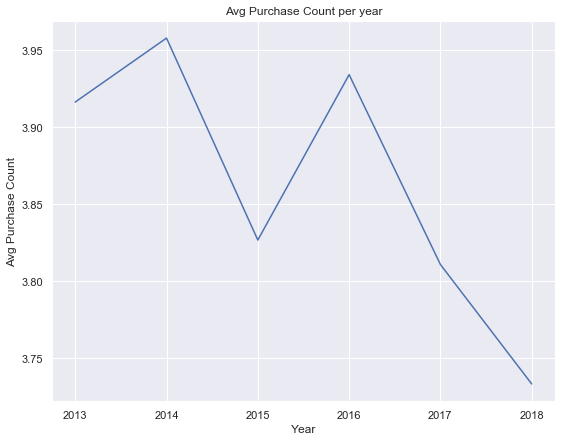

In [238]:
sns.set(rc={'figure.figsize':(9,7)})
axt = sns.lineplot(x='attribute',y='cnt',data=mr)
#plt.xticks([],[])
plt.xlabel('Year')
plt.ylabel('Avg Purchase Count')
plt.title('Avg Purchase Count per year')
plt.savefig('Avg Purchase Count per year.png')

In [239]:
### Get the duration between end_time and created 

f13['end_start'] = f13['end_time'] - f13['created']
f14['end_start'] = f14['end_time'] - f14['created']
f15['end_start'] = f15['end_time'] - f15['created']
f16['end_start'] = f16['end_time'] - f16['created']
f17['end_start'] = f17['end_time'] - f17['created']
f18['end_start'] = f18['end_time'] - f18['created']
f19['end_start'] = f19['end_time'] - f19['created']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [240]:
#Convert to seconds
f13['end_start'] = f13['end_start'].dt.total_seconds()
f14['end_start'] = f14['end_start'].dt.total_seconds()
f15['end_start'] = f15['end_start'].dt.total_seconds()
f16['end_start'] = f16['end_start'].dt.total_seconds()
f17['end_start'] = f17['end_start'].dt.total_seconds()
f18['end_start'] = f18['end_start'].dt.total_seconds()
f19['end_start'] = f19['end_start'].dt.total_seconds()


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [241]:
###### Mean duration from start to end(days)

es13 = (f13.groupby(['buyer_nick'], as_index=False).mean().groupby('buyer_nick')['end_start'].mean())
es13 = pd.DataFrame(es13)
es13 = es13.reset_index()
es13['end_start'] = round(es13['end_start']/(3600*24),2)

es14 = (f14.groupby(['buyer_nick'], as_index=False).mean().groupby('buyer_nick')['end_start'].mean())
es14 = pd.DataFrame(es14)
es14 = es14.reset_index()
es14['end_start'] = round(es14['end_start']/(3600*24),2)

es15 = (f15.groupby(['buyer_nick'], as_index=False).mean().groupby('buyer_nick')['end_start'].mean())
es15 = pd.DataFrame(es15)
es15 = es15.reset_index()
es15['end_start'] = round(es15['end_start']/(3600*24),2)

es16 = (f16.groupby(['buyer_nick'], as_index=False).mean().groupby('buyer_nick')['end_start'].mean())
es16 = pd.DataFrame(es16)
es16 = es16.reset_index()
es16['end_start'] = round(es16['end_start']/(3600*24),2)

es17 = (f17.groupby(['buyer_nick'], as_index=False).mean().groupby('buyer_nick')['end_start'].mean())
es17 = pd.DataFrame(es17)
es17 = es17.reset_index()
es17['end_start'] = round(es17['end_start']/(3600*24),2)

es18 = (f18.groupby(['buyer_nick'], as_index=False).mean().groupby('buyer_nick')['end_start'].mean())
es18 = pd.DataFrame(es18)
es18 = es18.reset_index()
es18['end_start'] = round(es18['end_start']/(3600*24),2)

es19 = (f19.groupby(['buyer_nick'], as_index=False).mean().groupby('buyer_nick')['end_start'].mean())
es19 = pd.DataFrame(es19)
es19 = es19.reset_index()
es19['end_start'] = round(es19['end_start']/(3600*24),2)

In [242]:
es13

,buyer_nick,end_start
0,0000梅子,4.26
1,000715心情,1.95
2,000李文杰,11.73
3,000狼妹妹000,4.48
4,003596468rong,2.30
5,007wallace,12.76
6,007天使之城,12.79
7,007崔伟,17.07
8,007懒猪,6.26
9,00801a,13.77


In [243]:
### Get the duration between end_time and pay_time 

f13['end_pay'] = f13['end_time'] - f13['pay_time']
f14['end_pay'] = f14['end_time'] - f14['pay_time']
f15['end_pay'] = f15['end_time'] - f15['pay_time']
f16['end_pay'] = f16['end_time'] - f16['pay_time']
f17['end_pay'] = f17['end_time'] - f17['pay_time']
f18['end_pay'] = f18['end_time'] - f18['pay_time']
f19['end_pay'] = f19['end_time'] - f19['pay_time']


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [244]:
#Convert to seconds
f13['end_pay'] = f13['end_pay'].dt.total_seconds()
f14['end_pay'] = f14['end_pay'].dt.total_seconds()
f15['end_pay'] = f15['end_pay'].dt.total_seconds()
f16['end_pay'] = f16['end_pay'].dt.total_seconds()
f17['end_pay'] = f17['end_pay'].dt.total_seconds()
f18['end_pay'] = f18['end_pay'].dt.total_seconds()
f19['end_pay'] = f19['end_pay'].dt.total_seconds()


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [245]:
###### Mean duration from pay to end(days)

ep13 = (f13.groupby(['buyer_nick'], as_index=False).mean().groupby('buyer_nick')['end_pay'].mean())
ep13 = pd.DataFrame(ep13)
ep13 = ep13.reset_index()
ep13['end_pay'] = round(ep13['end_pay']/(3600*24),2)

ep14 = (f14.groupby(['buyer_nick'], as_index=False).mean().groupby('buyer_nick')['end_pay'].mean())
ep14 = pd.DataFrame(ep14)
ep14 = ep14.reset_index()
ep14['end_pay'] = round(ep14['end_pay']/(3600*24),2)

ep15 = (f15.groupby(['buyer_nick'], as_index=False).mean().groupby('buyer_nick')['end_pay'].mean())
ep15 = pd.DataFrame(ep15)
ep15 = ep15.reset_index()
ep15['end_pay'] = round(ep15['end_pay']/(3600*24),2)

ep16 = (f16.groupby(['buyer_nick'], as_index=False).mean().groupby('buyer_nick')['end_pay'].mean())
ep16 = pd.DataFrame(ep16)
ep16 = ep16.reset_index()
ep16['end_pay'] = round(ep16['end_pay']/(3600*24),2)

ep17 = (f17.groupby(['buyer_nick'], as_index=False).mean().groupby('buyer_nick')['end_pay'].mean())
ep17 = pd.DataFrame(ep17)
ep17 = ep17.reset_index()
ep17['end_pay'] = round(ep17['end_pay']/(3600*24),2)

ep18 = (f18.groupby(['buyer_nick'], as_index=False).mean().groupby('buyer_nick')['end_pay'].mean())
ep18 = pd.DataFrame(ep18)
ep18 = ep18.reset_index()
ep18['end_pay'] = round(ep18['end_pay']/(3600*24),2)

ep19 = (f19.groupby(['buyer_nick'], as_index=False).mean().groupby('buyer_nick')['end_pay'].mean())
ep19 = pd.DataFrame(ep19)
ep19 = ep19.reset_index()
ep19['end_pay'] = round(ep19['end_pay']/(3600*24),2)

In [354]:
#ep13

In [247]:
#Group by Trade_from
trade13 = f13['trade_from'].value_counts()
trade13 = pd.DataFrame(trade13)
trade13 = trade13.reset_index()
trade13.columns=['trade_from', 'count']

trade14 = f14['trade_from'].value_counts()
trade14 = pd.DataFrame(trade14)
trade14 = trade14.reset_index()
trade14.columns=['trade_from', 'count']

trade15 = f15['trade_from'].value_counts()
trade15 = pd.DataFrame(trade15)
trade15 = trade15.reset_index()
trade15.columns=['trade_from', 'count']

trade16 = f16['trade_from'].value_counts()
trade16 = pd.DataFrame(trade16)
trade16 = trade16.reset_index()
trade16.columns=['trade_from', 'count']

trade17 = f17['trade_from'].value_counts()
trade17 = pd.DataFrame(trade17)
trade17 = trade17.reset_index()
trade17.columns=['trade_from', 'count']

trade18 = f18['trade_from'].value_counts()
trade18 = pd.DataFrame(trade18)
trade18 = trade18.reset_index()
trade18.columns=['trade_from', 'count']

trade19 = f19['trade_from'].value_counts()
trade19 = pd.DataFrame(trade19)
trade19 = trade19.reset_index()
trade19.columns=['trade_from', 'count']

In [248]:
trade13

,trade_from,count
0,TAOBAO,58578
1,JHS,38128
2,WAP,12732
3,"WAP,JHS",4216
4,"WAP,JHS,WAP",2009
5,"WAP,WAP",19


In [249]:
#Get the sum of price
f13['sum_price'] = f13['num'] * f13['price']
f14['sum_price'] = f14['num'] * f14['price']
f15['sum_price'] = f15['num'] * f15['price']
f16['sum_price'] = f16['num'] * f16['price']
f17['sum_price'] = f17['num'] * f17['price']
f18['sum_price'] = f18['num'] * f18['price']
f19['sum_price'] = f19['num'] * f19['price']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [250]:
# Get the discount rate
pr13 = f13[['sum_price']].groupby(f13['buyer_nick']).sum()
pr13 = pr13.reset_index()
df13 = df13.merge(pr13, on = 'buyer_nick')
df13['discount'] = round(df13['payment_post_fee']/df13['sum_price'],2)

pr14 = f14[['sum_price']].groupby(f14['buyer_nick']).sum()
pr14 = pr14.reset_index()
df14 = df14.merge(pr14, on = 'buyer_nick')
df14['discount'] = round(df14['payment_post_fee']/df14['sum_price'],2)

pr15 = f15[['sum_price']].groupby(f15['buyer_nick']).sum()
pr15 = pr15.reset_index()
df15 = df15.merge(pr15, on = 'buyer_nick')
df15['discount'] = round(df15['payment_post_fee']/df15['sum_price'],2)

pr16 = f16[['sum_price']].groupby(f16['buyer_nick']).sum()
pr16 = pr16.reset_index()
df16 = df16.merge(pr16, on = 'buyer_nick')
df16['discount'] = round(df16['payment_post_fee']/df16['sum_price'],2)

pr17 = f17[['sum_price']].groupby(f17['buyer_nick']).sum()
pr17 = pr17.reset_index()
df17 = df17.merge(pr17, on = 'buyer_nick')
df17['discount'] = round(df17['payment_post_fee']/df17['sum_price'],2)

pr18 = f18[['sum_price']].groupby(f18['buyer_nick']).sum()
pr18 = pr18.reset_index()
df18 = df18.merge(pr18, on = 'buyer_nick')
df18['discount'] = round(df18['payment_post_fee']/df18['sum_price'],2)

pr19 = f19[['sum_price']].groupby(f19['buyer_nick']).sum()
pr19 = pr19.reset_index()
df19 = df19.merge(pr19, on = 'buyer_nick')
df19['discount'] = round(df19['payment_post_fee']/df19['sum_price'],2)

In [251]:
df13

,buyer_nick,payment_post_fee,count,price_per_order,sum_price,discount
0,0000梅子,848.70,3,282.90,472.00,1.80
1,000715心情,1032.80,4,258.20,340.00,3.04
2,000李文杰,397.52,4,99.38,276.00,1.44
3,000狼妹妹000,1315.40,4,328.85,1320.00,1.00
4,003596468rong,1245.45,5,249.09,1035.00,1.20
5,007wallace,2098.00,8,262.25,901.90,2.33
6,007天使之城,701.10,3,233.70,528.90,1.33
7,007崔伟,306.20,3,102.07,540.90,0.57
8,007懒猪,704.00,4,176.00,522.00,1.35
9,00801a,302.38,4,75.60,305.00,0.99


In [252]:
f13[['buyer_nick','payment_post_fee','sum_price']]

,buyer_nick,payment_post_fee,sum_price
6,mln621120,115.00,226.0
7,mln621120,105.80,132.0
8,mln621120,53.90,69.0
9,mln621120,62.00,124.0
29,1314依依0,179.60,66.0
30,1314依依0,179.60,42.0
31,1314依依0,179.60,92.0
32,1314依依0,281.00,184.0
33,1314依依0,281.00,178.0
34,1314依依0,168.33,92.0


####Product

In [253]:
##1. Product Seasonality
##2. Product sales in cities tier
##3. Product Forecasting

In [254]:
##### Remove the transaction record with no product label
ps13 = ca13[ca13['p_sum']>0]
ps14 = ca14[ca14['p_sum']>0]
ps15 = ca15[ca15['p_sum']>0]
ps16 = ca16[ca16['p_sum']>0]
ps17 = ca17[ca17['p_sum']>0]
ps18 = ca18[ca18['p_sum']>0]
ps19 = ca19[ca19['p_sum']>0]

In [258]:
#ca13['product']

In [323]:
#Quarterly sales trend

#2013
psum13 = pd.pivot_table(ps13, index = ['quarter'], columns = ['product'], values = 'payment_post_fee', aggfunc = np.sum)
psum13 = psum13.reset_index()
psum13 = psum13.fillna(0)
psum13['quarter'] = ['13Q1', '13Q2','13Q3','13Q4']

#2014
psum14 = pd.pivot_table(ps14, index = ['quarter'], columns = ['product'], values = 'payment_post_fee', aggfunc = np.sum)
psum14 = psum14.reset_index()
psum14 = psum14.fillna(0)
psum14['quarter'] = ['14Q1', '14Q2','14Q3','14Q4']

#2015
psum15 = pd.pivot_table(ps15, index = ['quarter'], columns = ['product'], values = 'payment_post_fee', aggfunc = np.sum)
psum15 = psum15.reset_index()
psum15 = psum15.fillna(0)
psum15['quarter'] = ['15Q1', '15Q2','15Q3','15Q4']

#2016
psum16 = pd.pivot_table(ps16, index = ['quarter'], columns = ['product'], values = 'payment_post_fee', aggfunc = np.sum)
psum16 = psum16.reset_index()
psum16 = psum16.fillna(0)
psum16['quarter'] = ['16Q1', '16Q2','16Q3','16Q4']

#2017
psum17 = pd.pivot_table(ps17, index = ['quarter'], columns = ['product'], values = 'payment_post_fee', aggfunc = np.sum)
psum17 = psum17.reset_index()
psum17 = psum17.fillna(0)
psum17['quarter'] = ['17Q1', '17Q2','17Q3','17Q4']

#2018
psum18 = pd.pivot_table(ps18, index = ['quarter'], columns = ['product'], values = 'payment_post_fee', aggfunc = np.sum)
psum18 = psum18.reset_index()
psum18 = psum18.fillna(0)
psum18['quarter'] = ['18Q1', '18Q2','18Q3','18Q4']

psum = pd.concat([psum13,psum14, psum15, psum16, psum17, psum18])
psum = psum.fillna(0)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [324]:
psum

,8jin,bohe,chuju,duoxiao,furui,got2b,heijin,huancai,jinzhi,kuyin,lamuzi,paopaoran,quarter,shaoyao,shuilian,wuguiyou,yangrongzhi,yiran
0,0.000000e+00,0.00,0.00,1.830199e+04,0.00,4.199410e+05,8.046425e+05,124768.93,1.010000e+02,72589.64,0.00,4.572733e+04,13Q1,0.00,0.000000e+00,0.000000e+00,7.384833e+05,3.421626e+05
1,0.000000e+00,0.00,0.00,1.562284e+06,0.00,4.511164e+05,4.887196e+06,170923.43,0.000000e+00,168824.36,0.00,5.909794e+04,13Q2,0.00,0.000000e+00,0.000000e+00,1.625365e+06,9.218348e+05
2,0.000000e+00,0.00,0.00,1.704226e+06,0.00,5.346669e+05,3.869640e+06,213586.61,9.972268e+04,262157.41,0.00,1.067034e+05,13Q3,0.00,0.000000e+00,0.000000e+00,1.470088e+06,1.243132e+06
3,0.000000e+00,0.00,0.00,1.370868e+07,0.00,1.135014e+06,5.168512e+06,380692.02,1.251041e+06,330980.40,0.00,2.282386e+05,13Q4,0.00,0.000000e+00,0.000000e+00,7.397643e+06,1.843117e+06
0,0.000000e+00,0.00,0.00,3.582716e+06,0.00,7.800802e+05,3.393234e+06,259046.23,1.061287e+06,296625.42,0.00,8.362903e+04,14Q1,0.00,0.000000e+00,0.000000e+00,5.939586e+06,1.637788e+06
1,0.000000e+00,0.00,0.00,6.222776e+06,0.00,1.073491e+06,6.458890e+06,444808.85,1.273401e+06,391247.97,0.00,1.273853e+05,14Q2,0.00,2.505084e+06,0.000000e+00,4.685885e+06,3.131746e+06
2,0.000000e+00,0.00,0.00,3.800103e+06,0.00,9.333745e+05,5.975607e+06,327575.88,6.361778e+05,434171.20,0.00,1.535315e+05,14Q3,0.00,5.820204e+05,0.000000e+00,3.085002e+06,2.223363e+06
3,0.000000e+00,0.00,0.00,2.208668e+07,0.00,2.107280e+06,1.484289e+07,233112.95,1.372316e+06,400341.75,0.00,5.582725e+05,14Q4,0.00,6.130690e+06,0.000000e+00,1.713639e+07,6.831742e+06
0,2.025610e+03,0.00,0.00,7.645662e+06,0.00,1.102419e+06,2.673625e+06,318264.10,7.399146e+05,180637.94,0.00,2.296426e+05,15Q1,0.00,1.650153e+06,0.000000e+00,5.051406e+06,3.219774e+06
1,0.000000e+00,0.00,0.00,1.443120e+07,0.00,1.167665e+06,1.040065e+07,481485.37,2.259607e+06,336255.35,0.00,3.566366e+05,15Q2,0.00,5.634592e+06,0.000000e+00,5.369758e+06,8.413720e+06


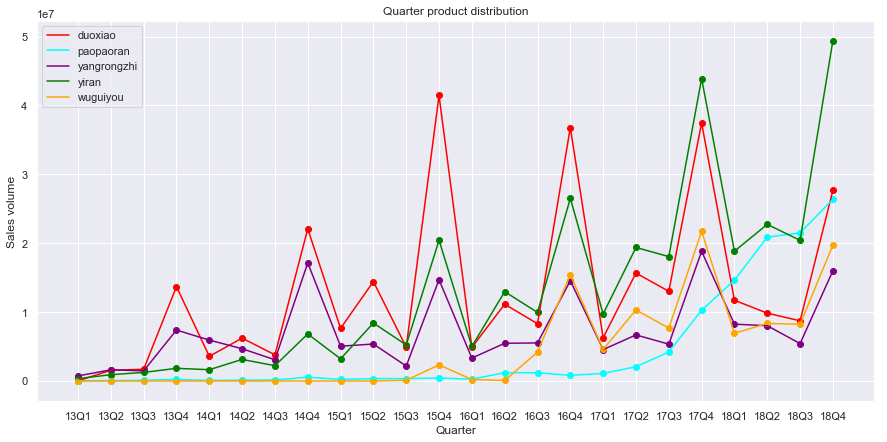

In [353]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15,7)

plt.scatter(psum['quarter'], psum['duoxiao'], color = 'red')
plt.plot(psum['quarter'], psum['duoxiao'], color = 'red')

#plt.scatter(psum['quarter'], psum['got2b'], color = 'orange')
#plt.plot(psum['quarter'], psum['got2b'], color = 'orange')

#plt.scatter(psum['quarter'], psum['heijin'], color = 'green')
#plt.plot(psum['quarter'], psum['heijin'], color = 'green')

#plt.scatter(psum['quarter'], psum['huancai'], color = 'deeppink')
#plt.plot(psum['quarter'], psum['huancai'], color = 'deeppink')

#plt.scatter(psum['quarter'], psum['jinzhi'], color = 'gray')
#plt.plot(psum['quarter'], psum['jinzhi'], color = 'gray')

#plt.scatter(psum['quarter'], psum['kuyin'], color = 'sandybrown')
#plt.plot(psum['quarter'], psum['kuyin'], color = 'sandybrown')

plt.scatter(psum['quarter'], psum['paopaoran'], color = 'cyan')
plt.plot(psum['quarter'], psum['paopaoran'], color = 'cyan')

plt.scatter(psum['quarter'], psum['yangrongzhi'], color = 'purple')
plt.plot(psum['quarter'], psum['yangrongzhi'], color = 'purple')

plt.scatter(psum['quarter'], psum['yiran'], color = 'green')
plt.plot(psum['quarter'], psum['yiran'], color = 'green')

#plt.scatter(psum['quarter'], psum['shuilian'], color = 'orange')
#plt.plot(psum['quarter'], psum['shuilian'], color = 'orange')

#plt.scatter(psum['quarter'], psum['8jin'], color = 'white')
#plt.plot(psum['quarter'], psum['8jin'], color = 'white')

#plt.scatter(psum['quarter'], psum['bohe'], color = 'powderblue')
#plt.plot(psum['quarter'], psum['bohe'], color = 'powderblue')

plt.scatter(psum['quarter'], psum['wuguiyou'], color = 'orange')
plt.plot(psum['quarter'], psum['wuguiyou'], color = 'orange')

#plt.scatter(psum['quarter'], psum['chuju'], color = 'pink')
#plt.plot(psum['quarter'], psum['chuju'], color = 'pink')

#plt.scatter(psum['quarter'], psum['furui'], color = 'gold')
#plt.plot(psum['quarter'], psum['furui'], color = 'gold')

#plt.legend(['duoxiao','got2b','heijin','huancai','jinzhi','kuyin','paopaoran','yangrongzhi','yiran','shuilian','8jin','bohe','wuguiyou','chuju','furui'], loc = 'upper left')
plt.legend(['duoxiao','paopaoran','yangrongzhi','yiran','wuguiyou'], loc = 'upper left')
plt.xlabel('Quarter')
plt.ylabel('Sales volume')
plt.title('Quarter product distribution')
plt.savefig('Quarter product distribution.png')



In [339]:
#Monthly Sales trend

#2013
pm13 = pd.pivot_table(ps13, index = ['month'], columns = ['product'], values = 'payment_post_fee', aggfunc = np.sum)
pm13 = pm13.reset_index()
pm13 = pm13.fillna(0)
pm13['month'] = ['1301', '1302','1303','1304','1305','1306','1307','1308','1309','1310','1311','1312']

#2014
pm14 = pd.pivot_table(ps14, index = ['month'], columns = ['product'], values = 'payment_post_fee', aggfunc = np.sum)
pm14 = pm14.reset_index()
pm14 = pm14.fillna(0)
pm14['month'] = ['1401', '1402','1403','1404','1405','1406','1407','1408','1409','1410','1411','1412']

#2015
pm15 = pd.pivot_table(ps15, index = ['month'], columns = ['product'], values = 'payment_post_fee', aggfunc = np.sum)
pm15 = pm15.reset_index()
pm15 = pm15.fillna(0)
pm15['month'] = ['1501', '1502','1503','1504','1505','1506','1507','1508','1509','1510','1511','1512']

#2016
pm16 = pd.pivot_table(ps16, index = ['month'], columns = ['product'], values = 'payment_post_fee', aggfunc = np.sum)
pm16 = pm16.reset_index()
pm16 = pm16.fillna(0)
pm16['month'] = ['1601', '1602','1603','1604','1605','1606','1607','1608','1609','1610','1611','1612']

#2017
pm17 = pd.pivot_table(ps17, index = ['month'], columns = ['product'], values = 'payment_post_fee', aggfunc = np.sum)
pm17 = pm17.reset_index()
pm17 = pm17.fillna(0)
pm17['month'] = ['1701', '1702','1703','1704','1705','1706','1707','1708','1709','1710','1711','1712']

#2018
pm18 = pd.pivot_table(ps18, index = ['month'], columns = ['product'], values = 'payment_post_fee', aggfunc = np.sum)
pm18 = pm18.reset_index()
pm18 = pm18.fillna(0)
pm18['month'] = ['1801', '1802','1803','1804','1805','1806','1807','1808','1809','1810','1811','1812']

pm = pd.concat([pm13,pm14, pm15, pm16, pm17, pm18])
pm = pm.fillna(0)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [352]:
#pm

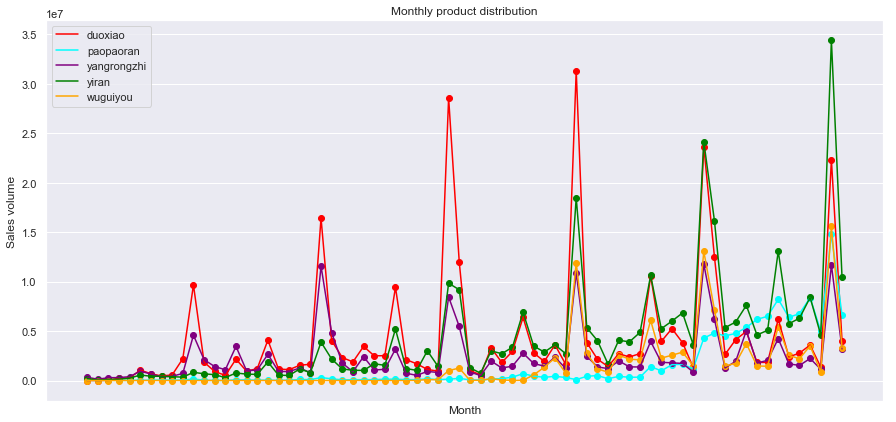

In [351]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15,7)

plt.scatter(pm['month'], pm['duoxiao'], color = 'red')
plt.plot(pm['month'], pm['duoxiao'], color = 'red')

plt.scatter(pm['month'], pm['paopaoran'], color = 'cyan')
plt.plot(pm['month'], pm['paopaoran'], color = 'cyan')

plt.scatter(pm['month'], pm['yangrongzhi'], color = 'purple')
plt.plot(pm['month'], pm['yangrongzhi'], color = 'purple')

plt.scatter(pm['month'], pm['yiran'], color = 'green')
plt.plot(pm['month'], pm['yiran'], color = 'green')

plt.scatter(pm['month'], pm['wuguiyou'], color = 'orange')
plt.plot(pm['month'], pm['wuguiyou'], color = 'orange')

plt.legend(['duoxiao','paopaoran','yangrongzhi','yiran','wuguiyou'], loc = 'upper left')
plt.xticks([],[])
plt.xlabel('Month')
plt.ylabel('Sales volume')
plt.title('Monthly product distribution')
plt.savefig('Monthly product distribution.png')

In [378]:
#Cities-tier sales trend

#2013
#pc13 = pd.pivot_table(ps13, index = ['cities_tier'], columns = ['product'], values = 'payment_post_fee', aggfunc = np.sum)
#pc13 = pc13.drop(['hongkong_macau_taiwan','overseas'])
#pc13['city_lvl'] = [6,1,5,2,3,4]
#pc13 = pc13.sort_values(by='city_lvl')
#pc13 = pc13.reset_index()
#pc13 = pc13.fillna(0)

#2014
#pc14 = pd.pivot_table(ps14, index = ['cities_tier'], columns = ['product'], values = 'payment_post_fee', aggfunc = np.sum)
#pc14 = pc14.reset_index()
#pc14 = pc14.fillna(0)

#2015
#pc15 = pd.pivot_table(ps15, index = ['cities_tier'], columns = ['product'], values = 'payment_post_fee', aggfunc = np.sum)
#pc15 = pc15.drop(['hongkong_macau_taiwan'])
#pc15 = pc15.reset_index()
#pc15 = pc15.fillna(0)

#2016
#pc16 = pd.pivot_table(ps16, index = ['cities_tier'], columns = ['product'], values = 'payment_post_fee', aggfunc = np.sum)
#pc16 = pc16.drop(['hongkong_macau_taiwan'])
#pc16 = pc16.reset_index()
#pc16 = pc16.fillna(0)




In [379]:
#pc13

In [380]:
##fig = matplotlib.pyplot.gcf()
#fig.set_size_inches(9,7)

#plt.scatter(pc13['cities_tier'], pc13['duoxiao'], color = 'red')
#plt.plot(pc13['cities_tier'], pc13['duoxiao'], color = 'red')

#plt.scatter(pc13['cities_tier'], pc13['paopaoran'], color = 'cyan')
#plt.plot(pc13['cities_tier'], pc13['paopaoran'], color = 'cyan')

#plt.scatter(pc13['cities_tier'], pc13['yangrongzhi'], color = 'purple')
#plt.plot(pc13['cities_tier'], pc13['yangrongzhi'], color = 'purple')

#plt.scatter(pc13['cities_tier'], pc13['yiran'], color = 'green')
#plt.plot(pc13['cities_tier'], pc13['yiran'], color = 'green')

#plt.legend(['duoxiao','paopaoran','yangrongzhi','yiran'], loc = 'upper right')
#plt.xticks([],[])
#plt.xlabel('Cities_tier')
#plt.ylabel('Sales volume')
#plt.title('Product distribution for different cities-tier')
#plt.savefig('Product distribution for different cities-tier.png')